In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DSCS Keylogger/Final_Keylogger.csv')  # Replace with your dataset path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39000 entries, 0 to 38999
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    39000 non-null  int64  
 1   Flow ID                       38999 non-null  object 
 2    Source IP                    39000 non-null  object 
 3    Source Port                  39000 non-null  float64
 4    Destination IP               39000 non-null  object 
 5    Destination Port             39000 non-null  float64
 6    Protocol                     39000 non-null  float64
 7    Timestamp                    39000 non-null  object 
 8    Flow Duration                39000 non-null  float64
 9    Total Fwd Packets            39000 non-null  float64
 10   Total Backward Packets       39000 non-null  float64
 11  Total Length of Fwd Packets   39000 non-null  float64
 12   Total Length of Bwd Packets  39000 non-null  float64
 13   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38998 entries, 0 to 38999
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Source Port                  38998 non-null  float64
 1    Destination Port             38998 non-null  float64
 2    Protocol                     38998 non-null  float64
 3    Flow Duration                38998 non-null  float64
 4    Total Fwd Packets            38998 non-null  float64
 5    Total Backward Packets       38998 non-null  float64
 6   Total Length of Fwd Packets   38998 non-null  float64
 7    Total Length of Bwd Packets  38998 non-null  float64
 8    Fwd Packet Length Max        38998 non-null  float64
 9    Fwd Packet Length Min        38998 non-null  float64
 10   Fwd Packet Length Mean       38998 non-null  float64
 11   Fwd Packet Length Std        38998 non-null  float64
 12  Bwd Packet Length Max         38998 non-null  float64
 13   Bwd P

In [ ]:
df.drop(columns=["Unnamed: 0", "Flow ID", " Timestamp", " Source IP", " Destination IP"], inplace=True)
df.head()

Source Port   Destination Port   Protocol   Flow Duration  \
0       27853.0               53.0       17.0         31733.0   
1       52385.0               80.0        6.0        263023.0   
2       35065.0               80.0        6.0     113237290.0   
3       41988.0              443.0        6.0        584738.0   
4         443.0            48707.0        6.0          9197.0   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0                 1.0                      1.0                         30.0   
1                 1.0                      1.0                          0.0   
2                 2.0                      0.0                          0.0   
3                 2.0                      0.0                         46.0   
4                 1.0                      1.0                          0.0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          98.0                    30.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                    23.0   
4                           0.0                     0.0   

    Fwd Packet Length Min  ...   min_seg_size_forward  Active Mean  \
0                    30.0  ...                   20.0          0.0   
1                     0.0  ...                   20.0          0.0   
2                     0.0  ...                   32.0          0.0   
3                    23.0  ...                   32.0          0.0   
4                     0.0  ...                   20.0          0.0   

    Active Std   Active Max   Active Min    Idle Mean   Idle Std     Idle Max  \
0          0.0          0.0          0.0          0.0        0.0          0.0   
1          0.0          0.0          0.0          0.0        0.0          0.0   
2          0.0          0.0          0.0  113237290.0        0.0  113237290.0   
3          0.0          0.0          0.0          0.0        0.0          0.0   
4          0.0          0.0          0.0          0.0        0.0          0.0   

      Idle Min      Class  
0          0.0     Benign  
1          0.0  Keylogger  
2  113237290.0  Keylogger  
3          0.0  Keylogger  
4          0.0     Benign  

[5 rows x 81 columns]

In [ ]:
null_counts = df.isnull().sum()
print(null_counts.to_string())

Src_Port             0
Dst_Port             0
Protocol             0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Bwd_IAT_Mean         0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Fwd_IAT_Std          0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s           0
Pkt_Len_Min          0
Pkt_Len_Max          0
Pkt_Len_Mean         0
Pkt_Len_Std

**Correlation Matrix**

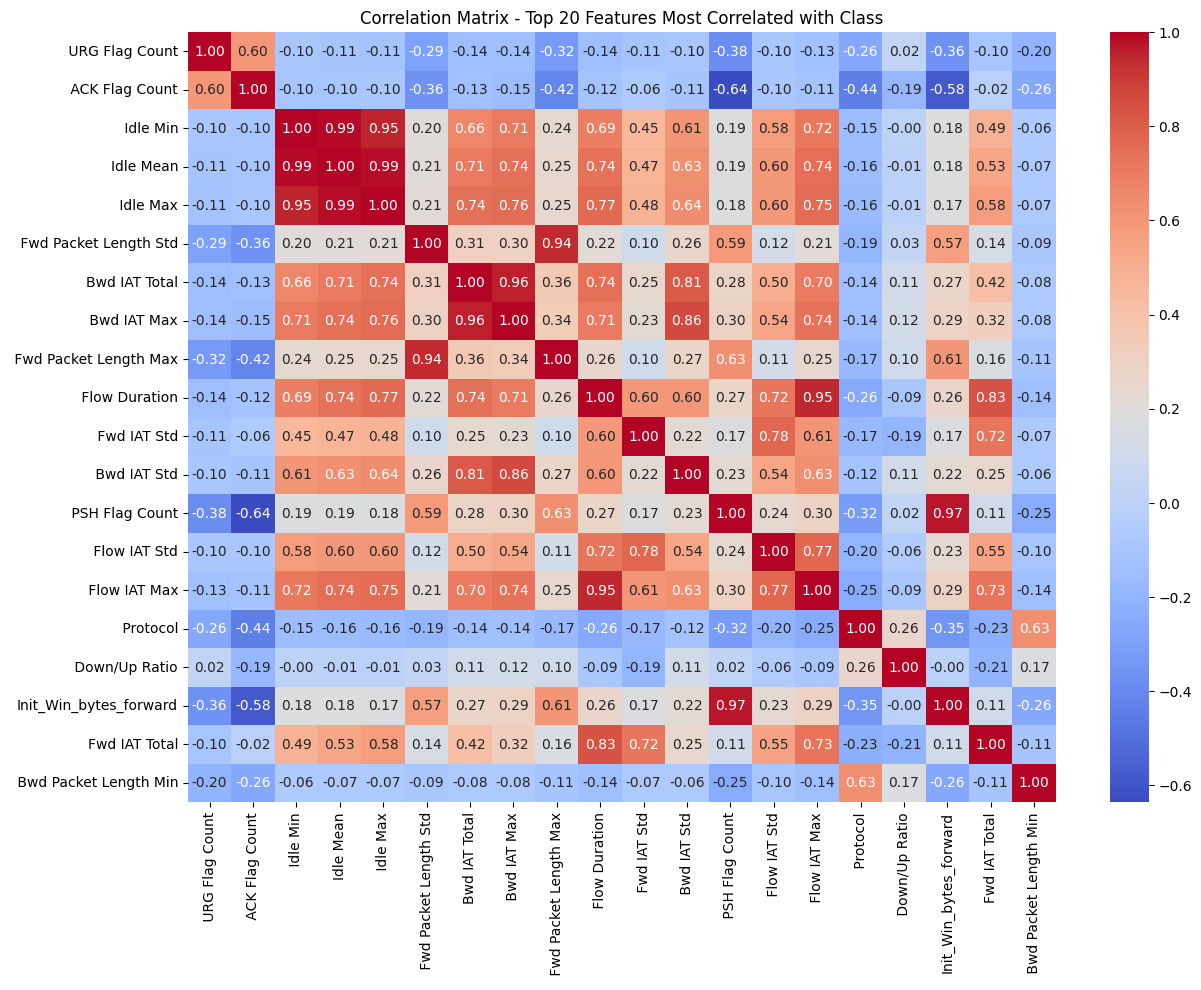

In [ ]:
# Convert target to numeric if needed
df['Class_num'] = df['Class'].astype('category').cat.codes  # 0, 1 encoding

# Get correlation with Class
correlation = df.corr(numeric_only=True)['Class_num'].abs().sort_values(ascending=False)

# Top 20 most correlated features with Class
top_features = correlation[1:21].index.tolist()  # skip Class_num itself

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Top 20 Features Most Correlated with Class')
plt.show()


**Histogram**

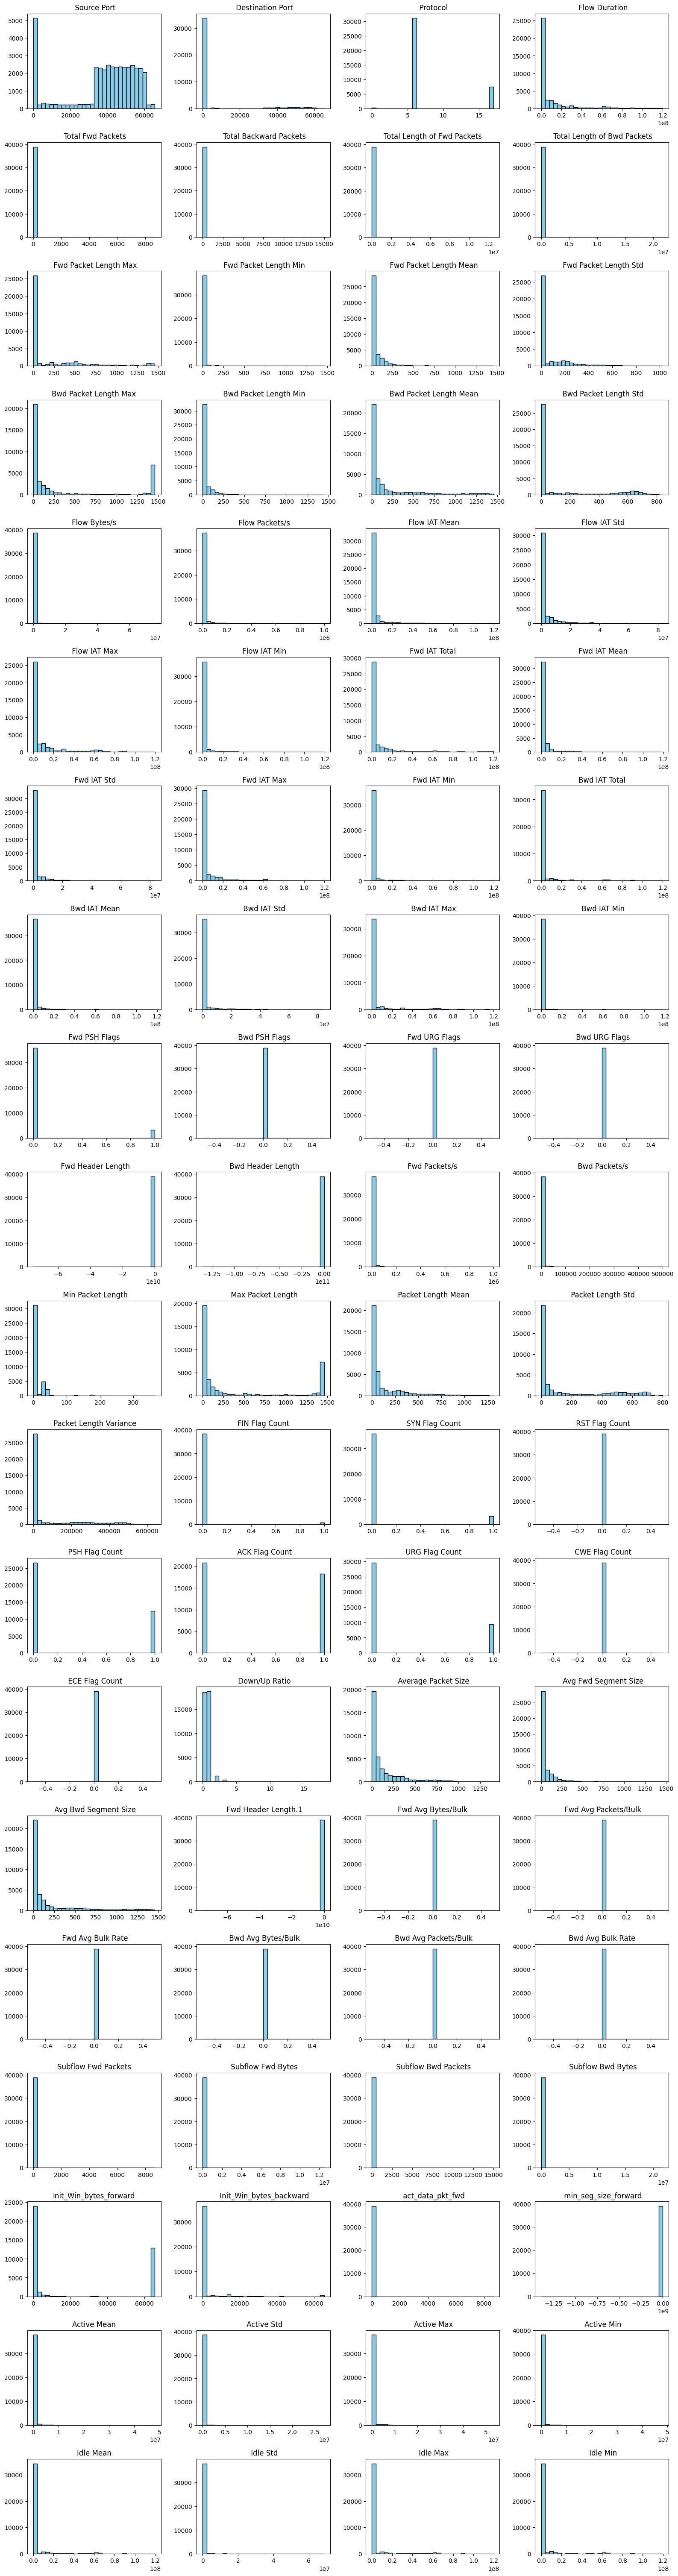

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Class_num') if 'Class_num' in numeric_cols else None

def plot_histograms(df, columns, cols_per_row=4):
    total = len(columns)
    rows = (total // cols_per_row) + 1
    plt.figure(figsize=(cols_per_row * 4, rows * 3))
    for i, col in enumerate(columns):
        plt.subplot(rows, cols_per_row, i + 1)
        plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_histograms(df, numeric_cols)



**Violin Plot**

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

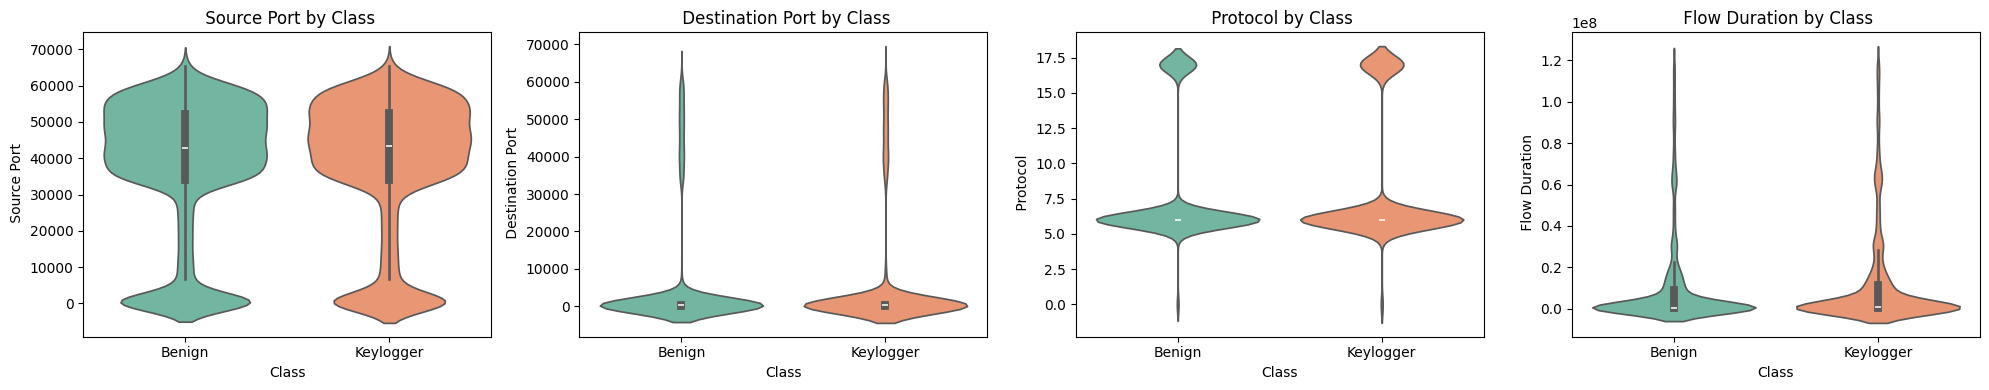

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

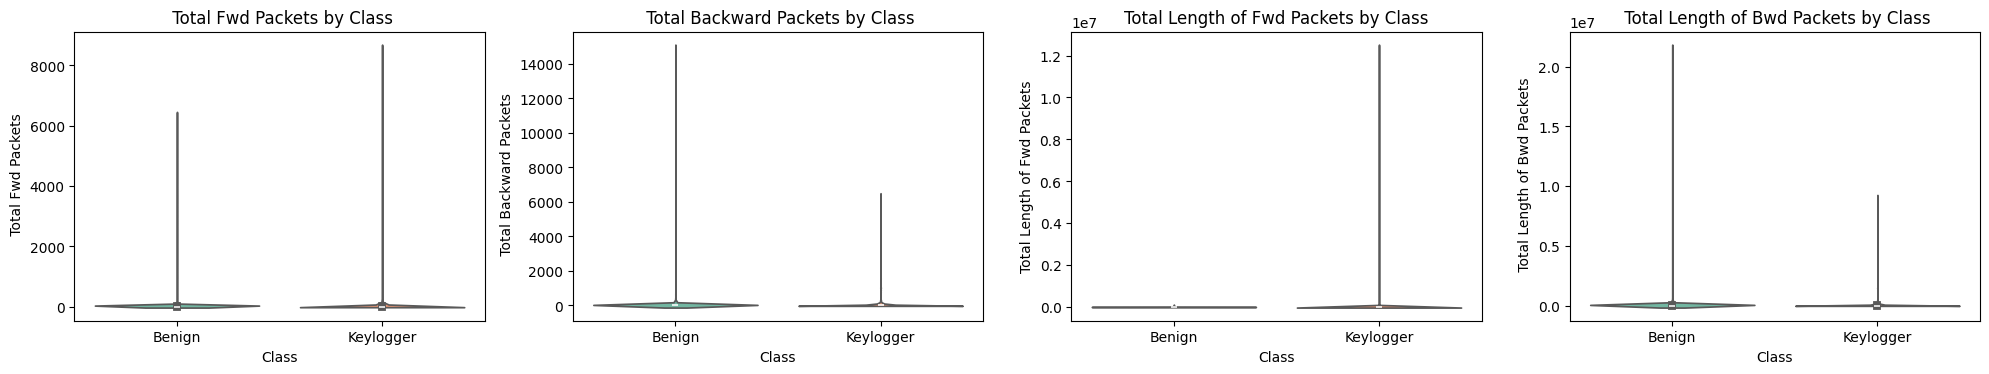

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

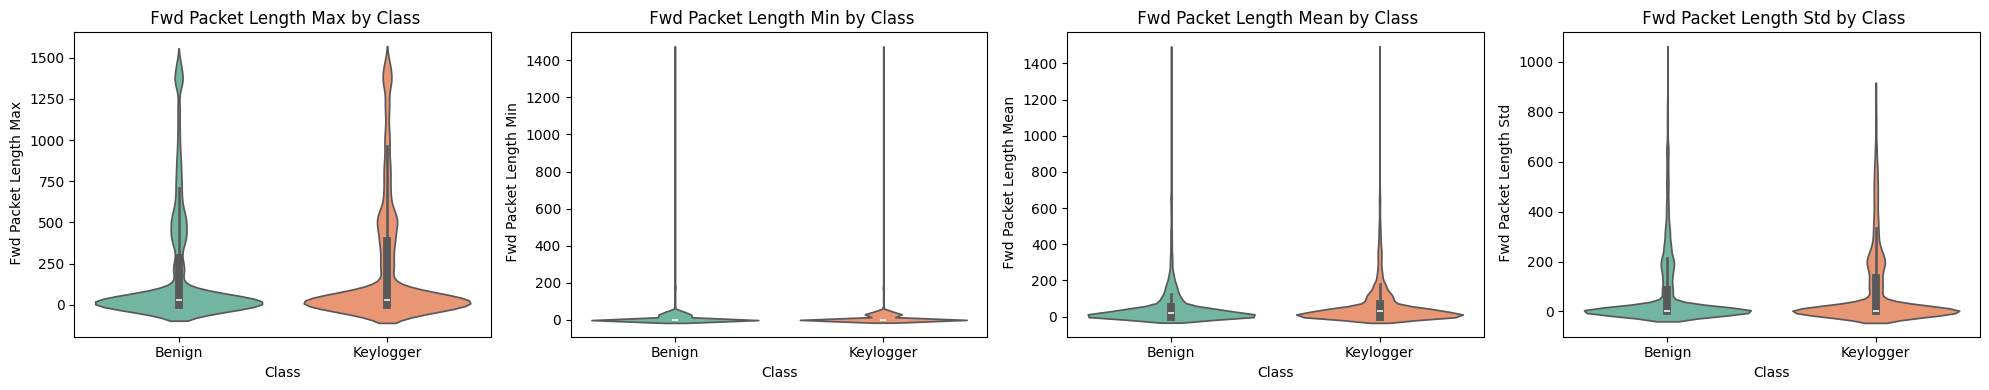

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

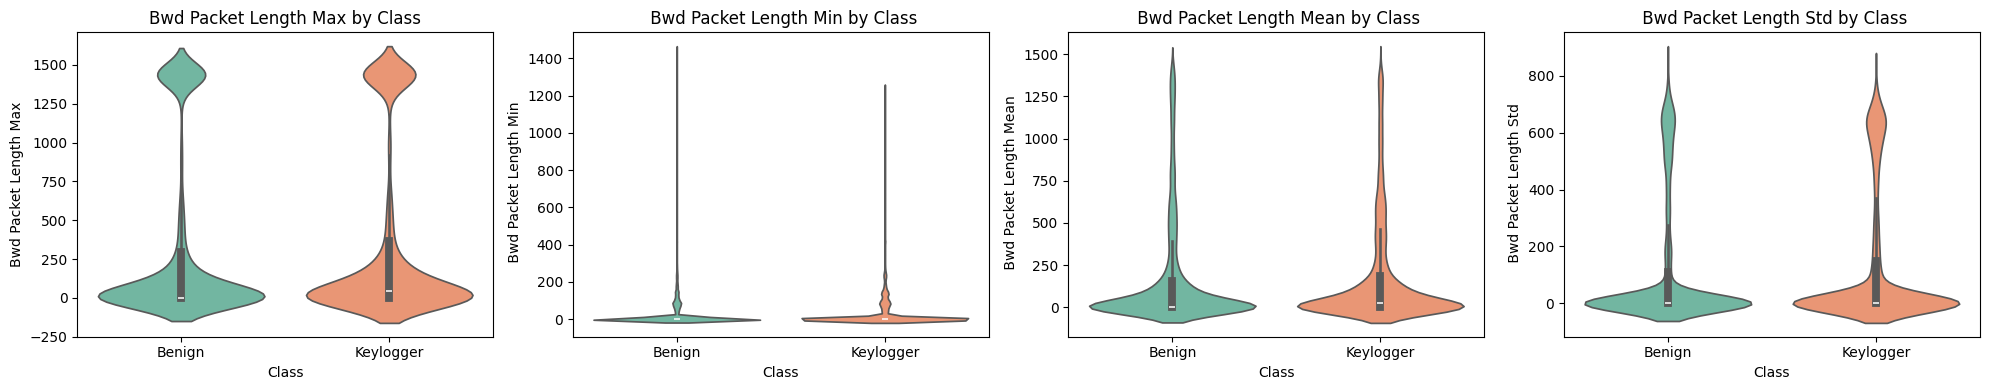

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

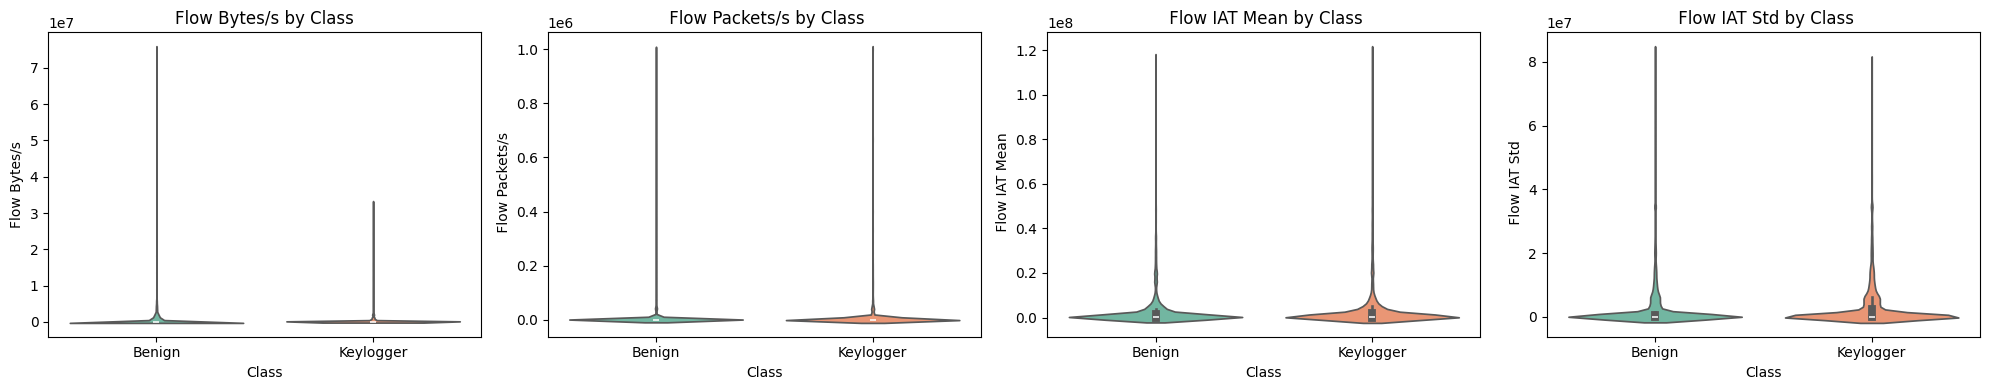

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

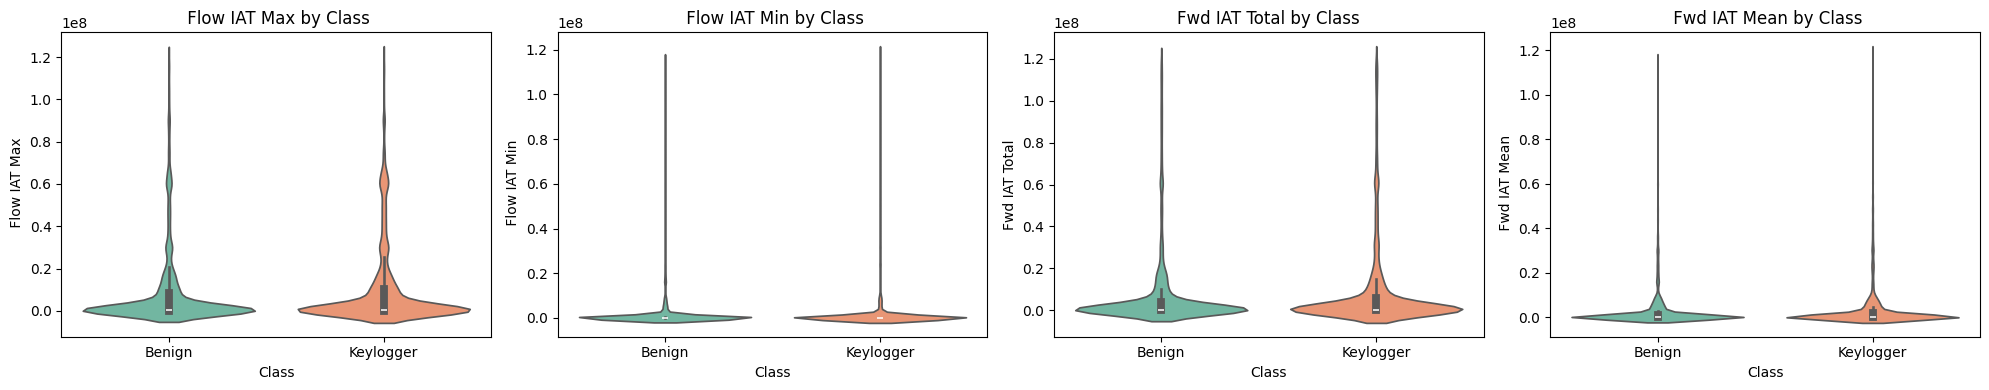

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

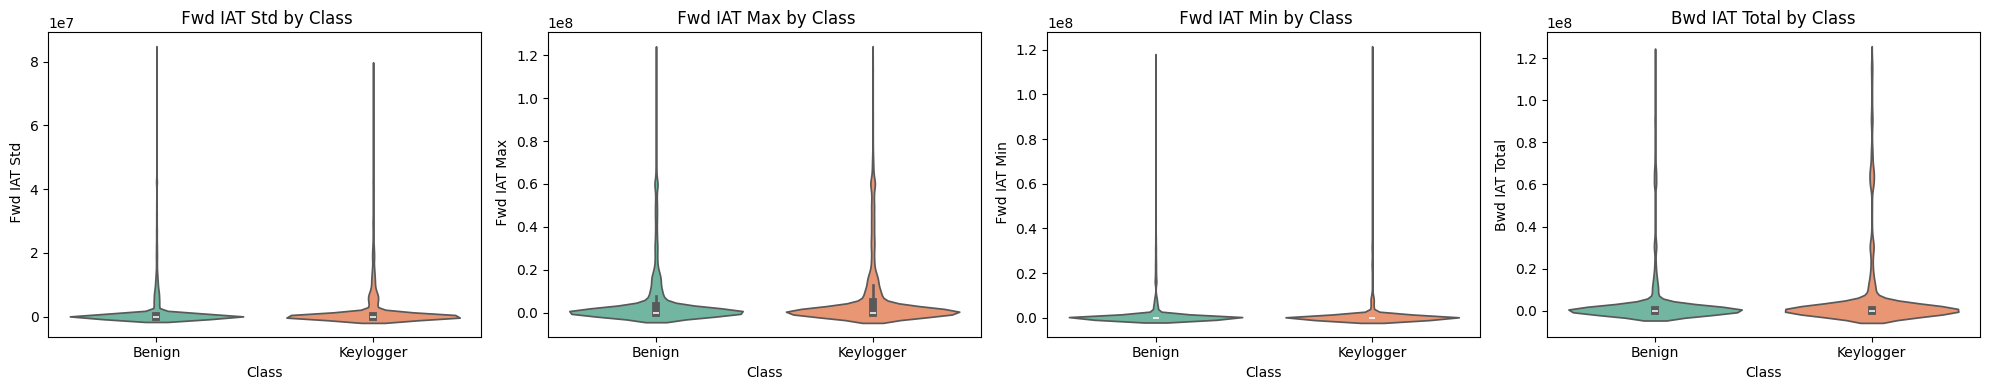

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

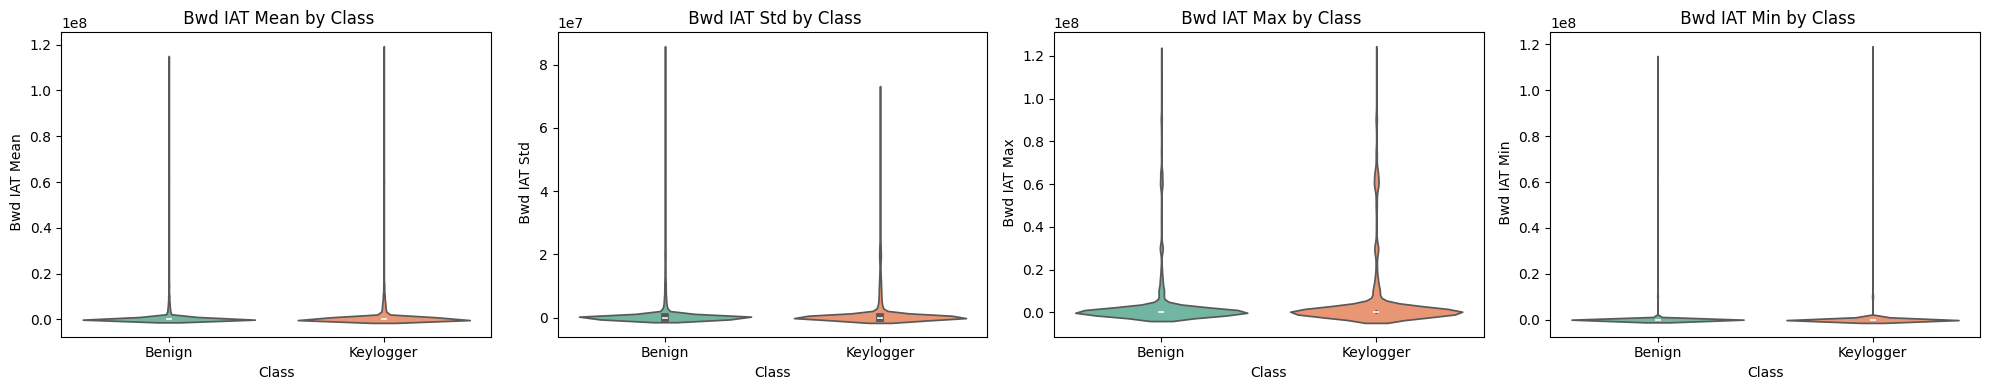

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

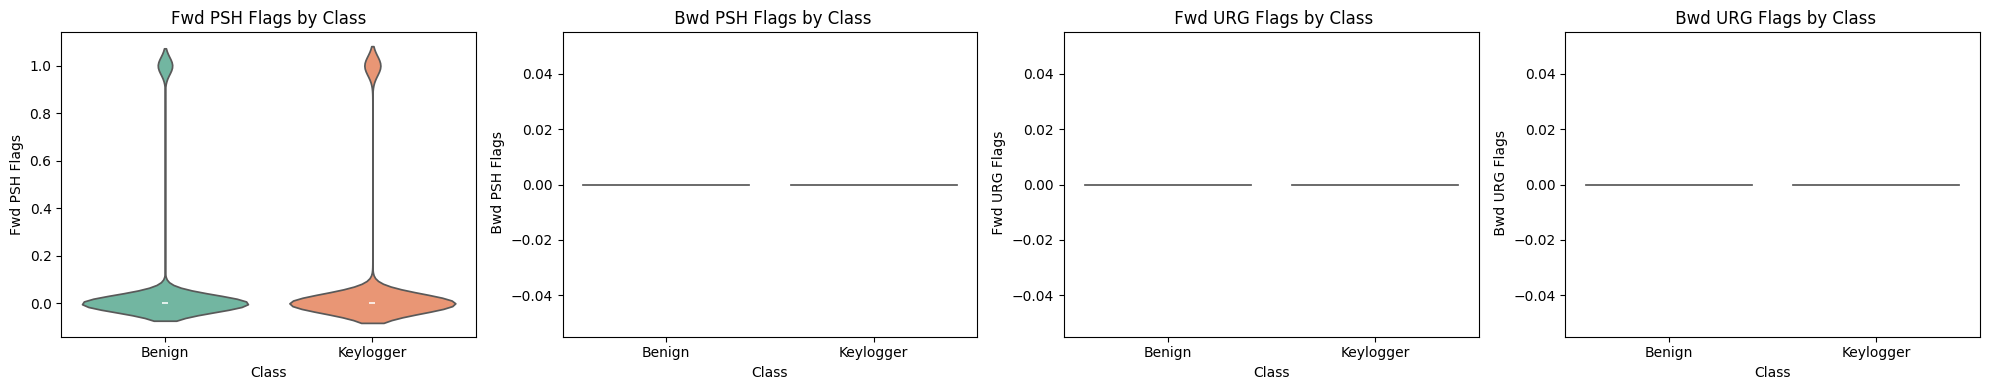

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

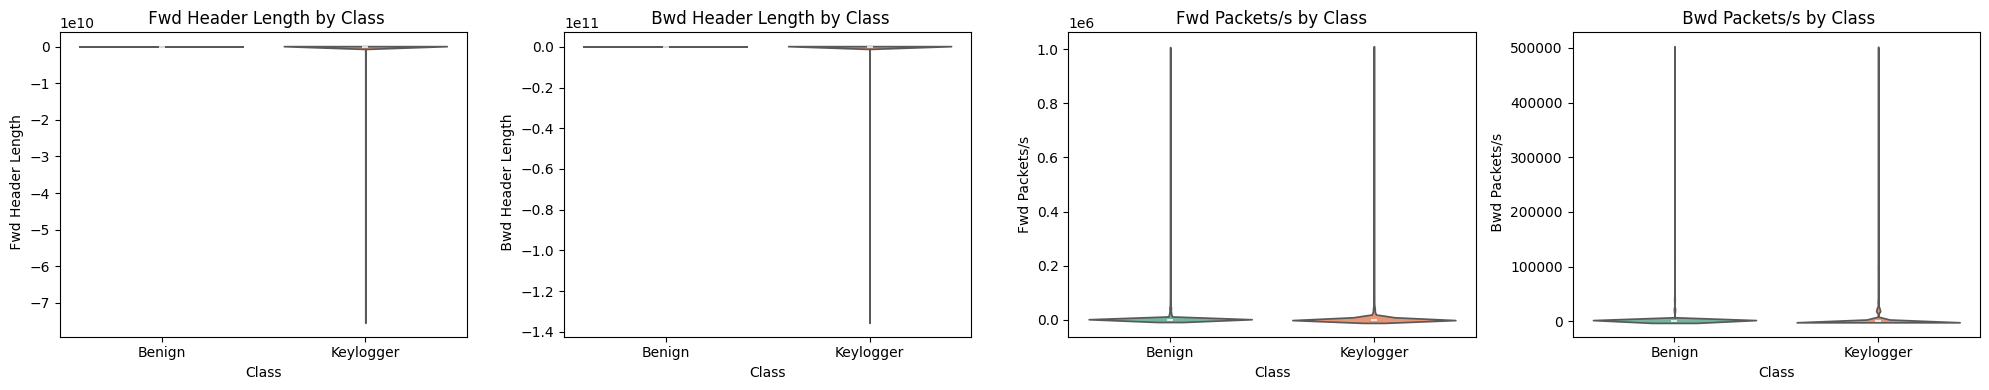

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

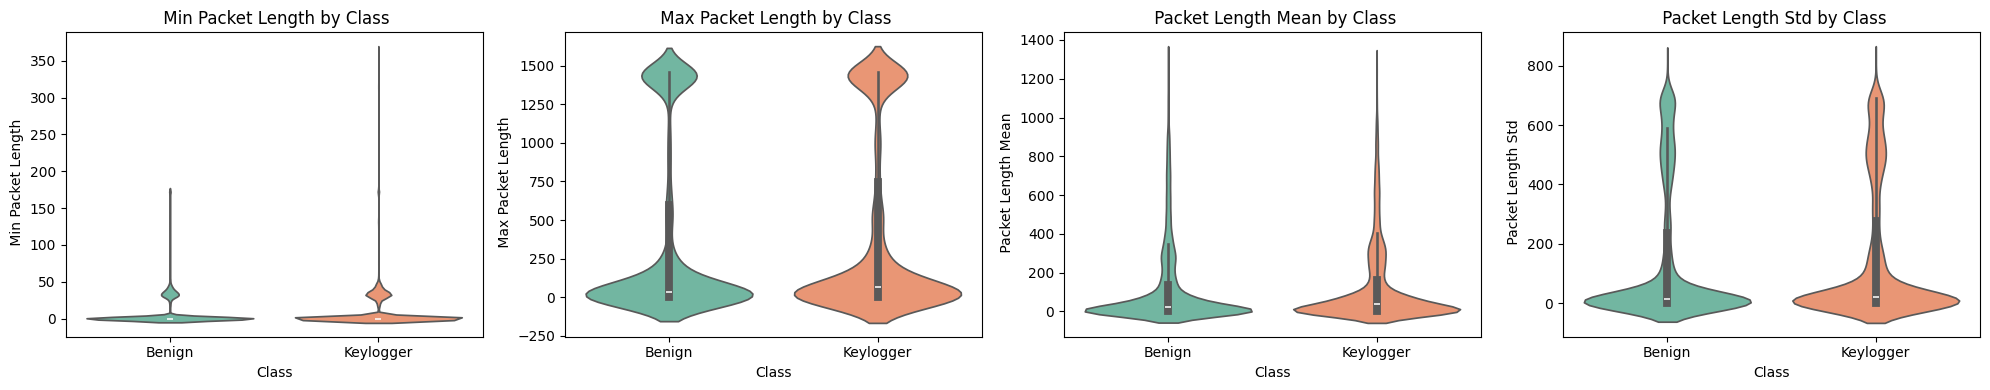

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

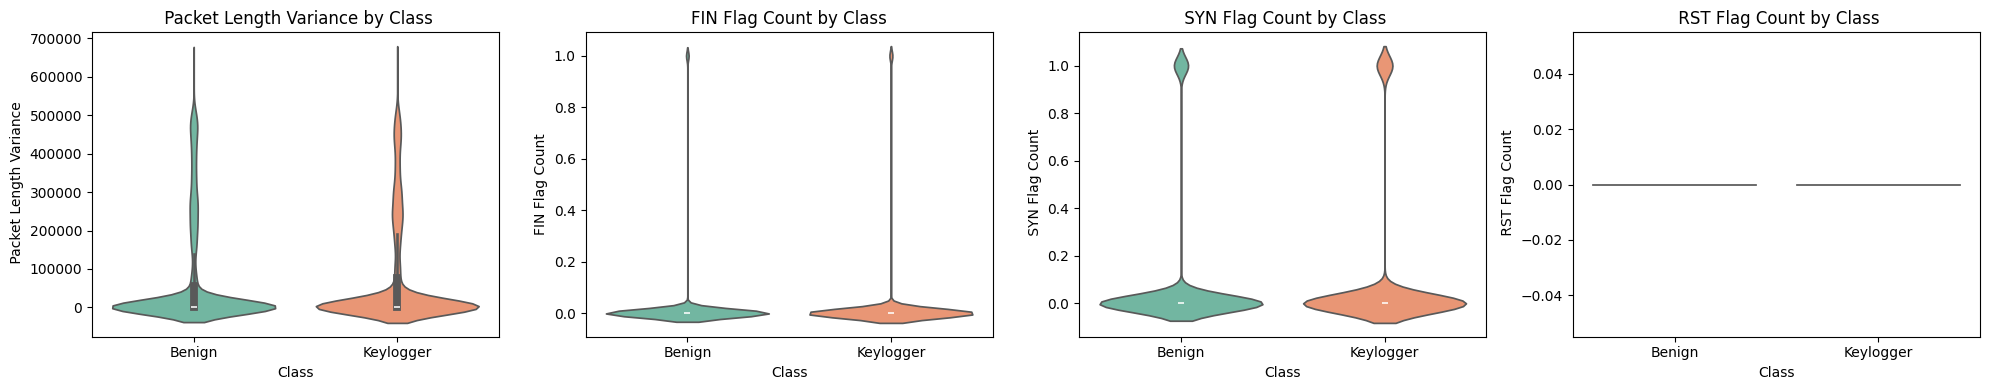

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

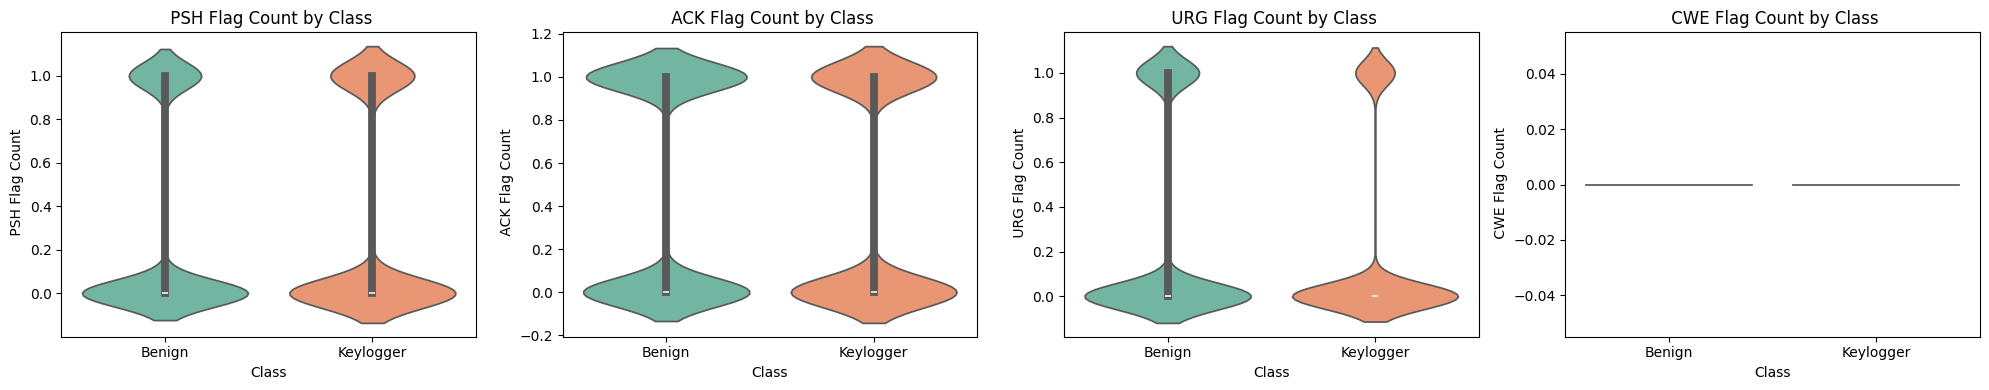

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

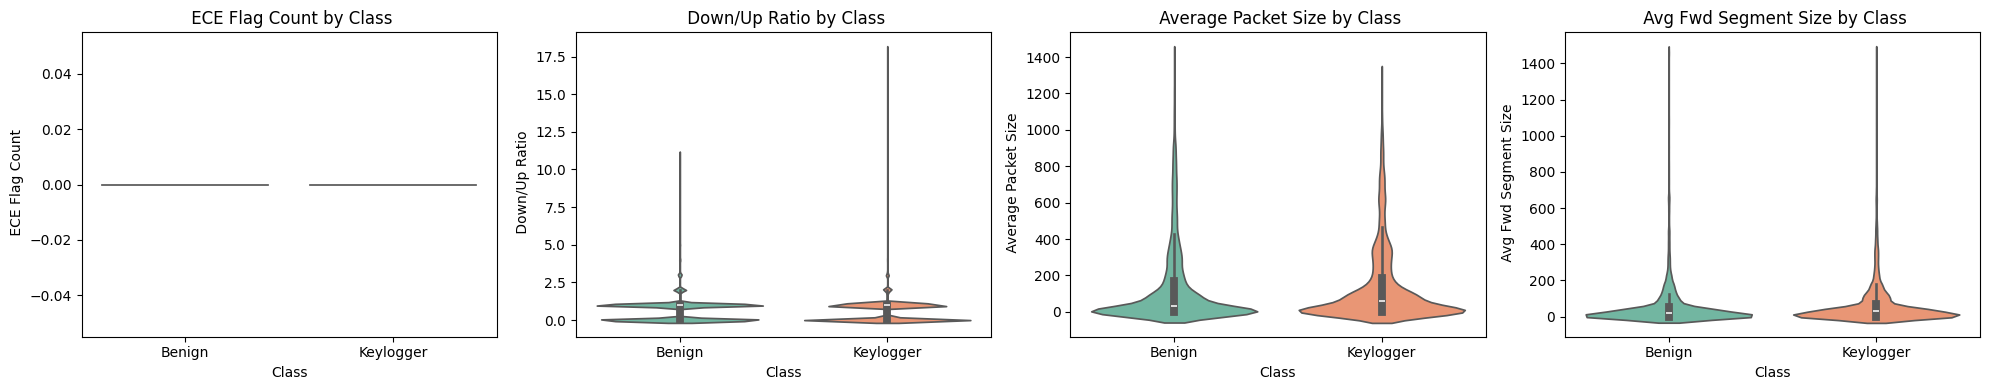

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

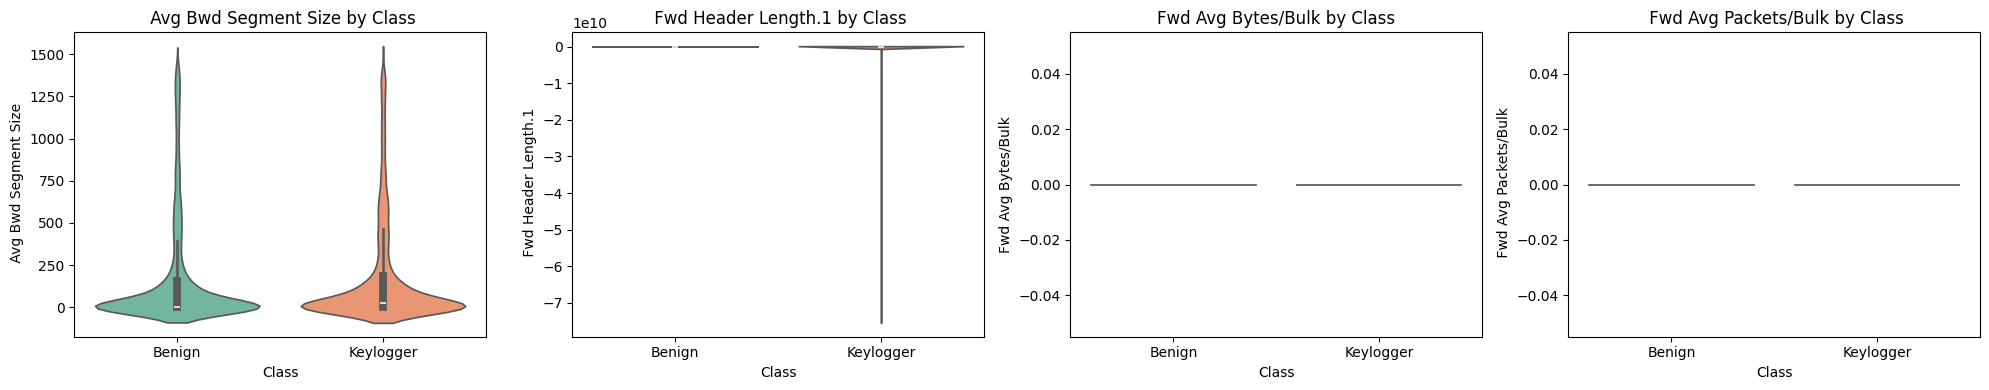

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

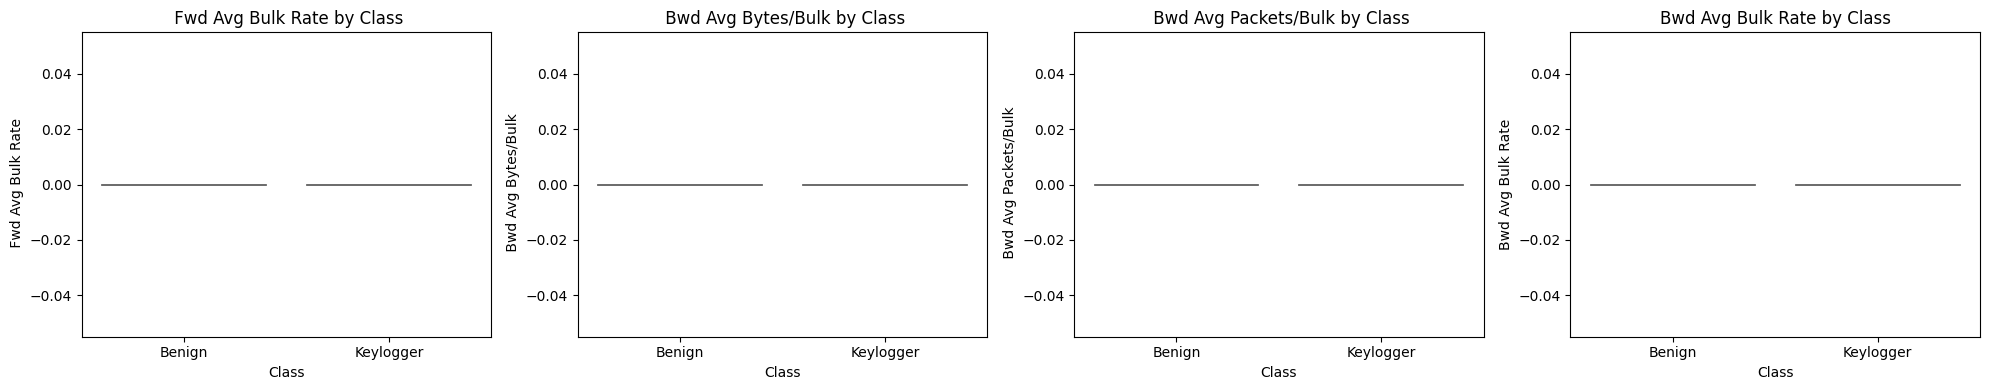

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

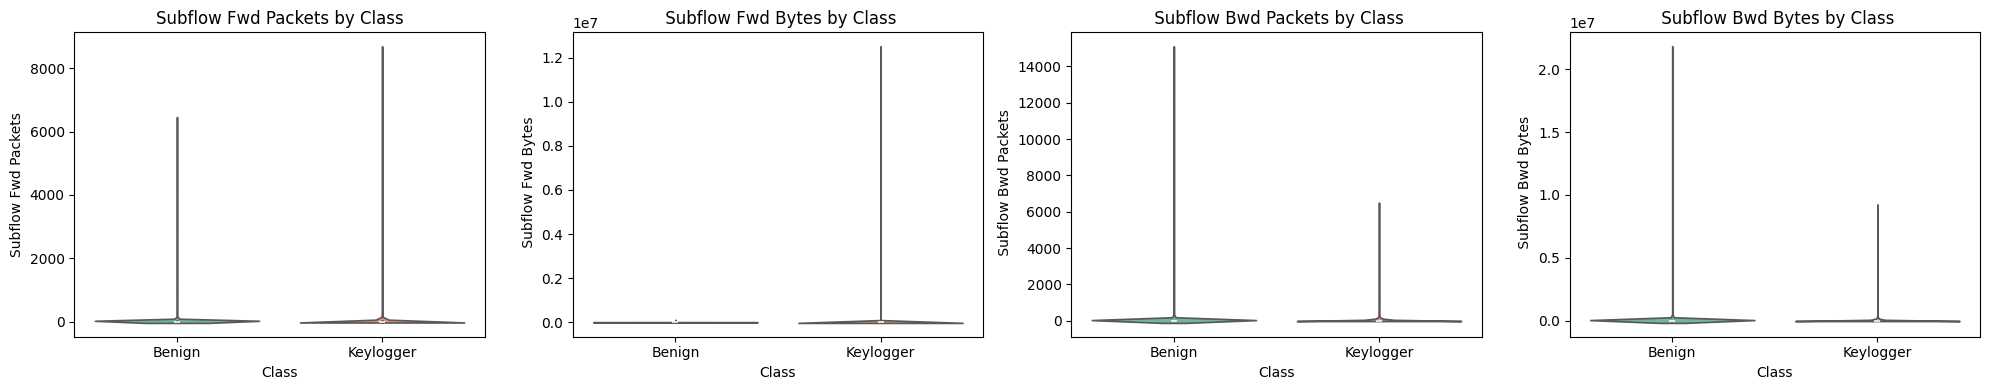

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

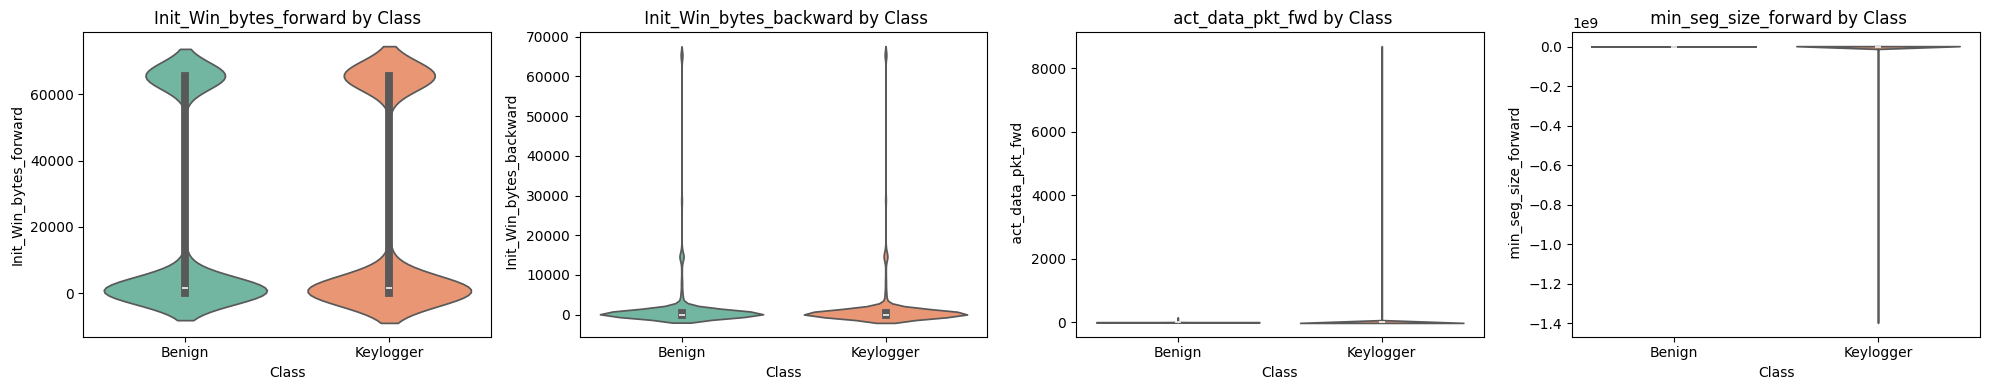

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

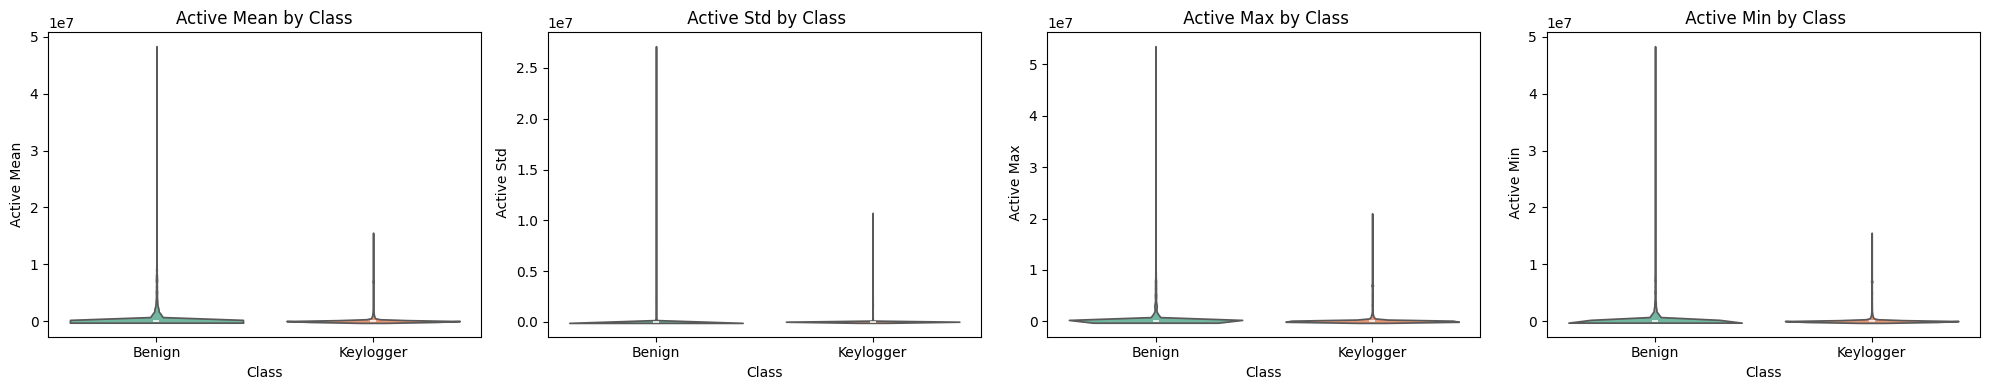

<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-33-57c4c5e7976d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

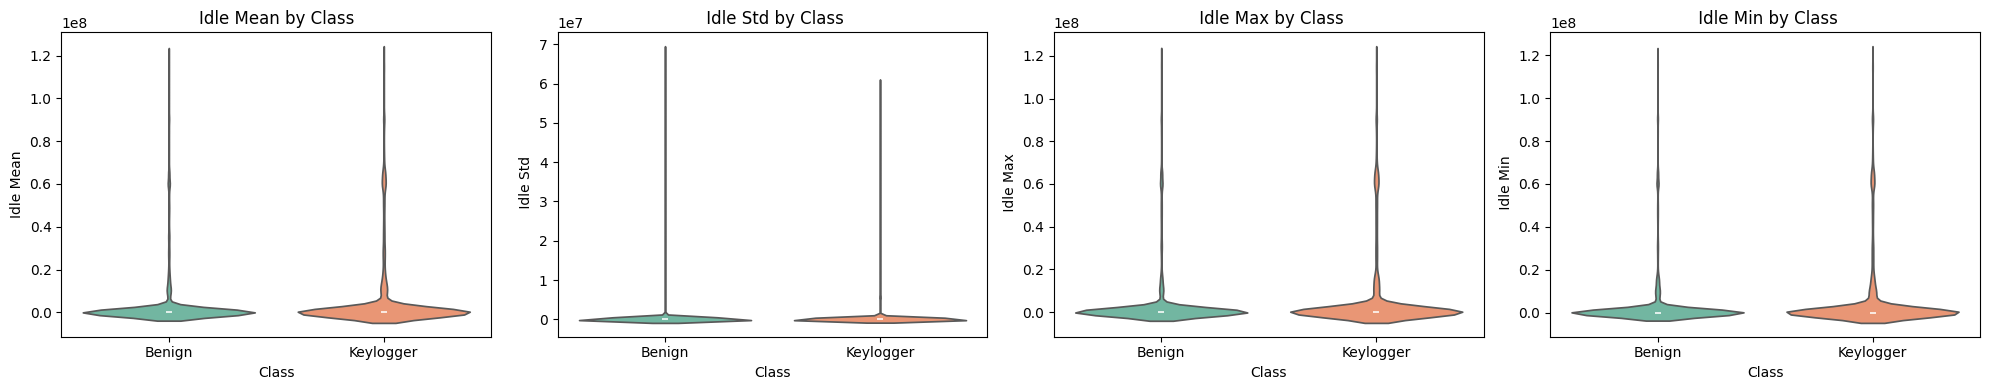

In [ ]:
def plot_violin_plots(df, columns, target='Class', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_violin_plots(df, numeric_cols)



**BoxPlot**

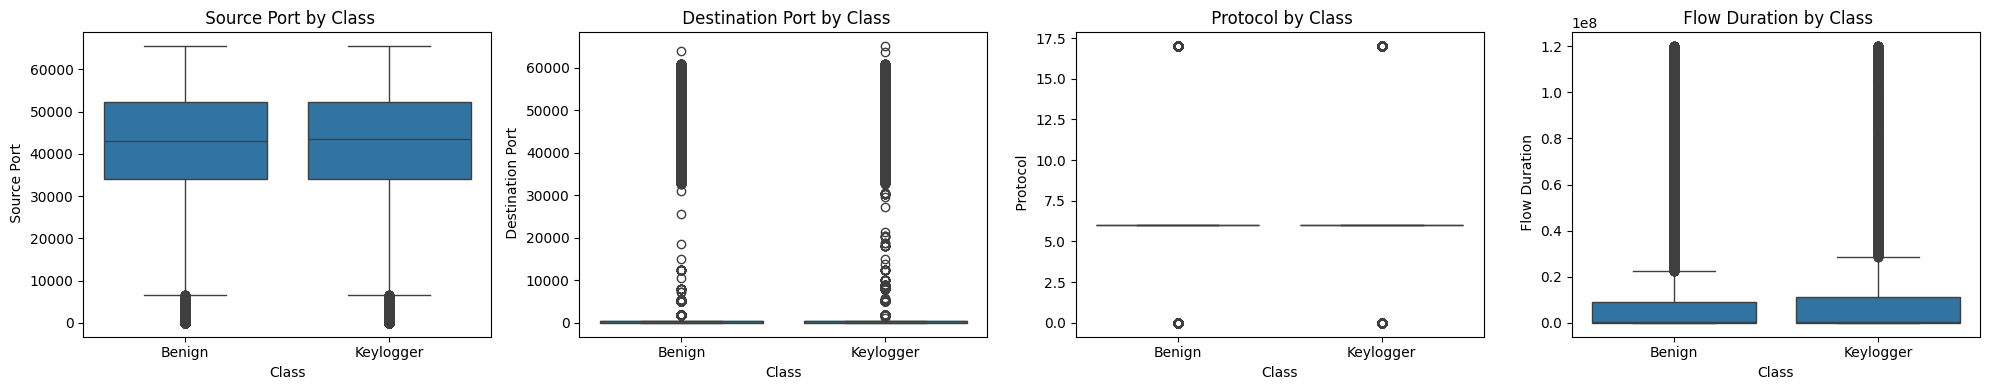

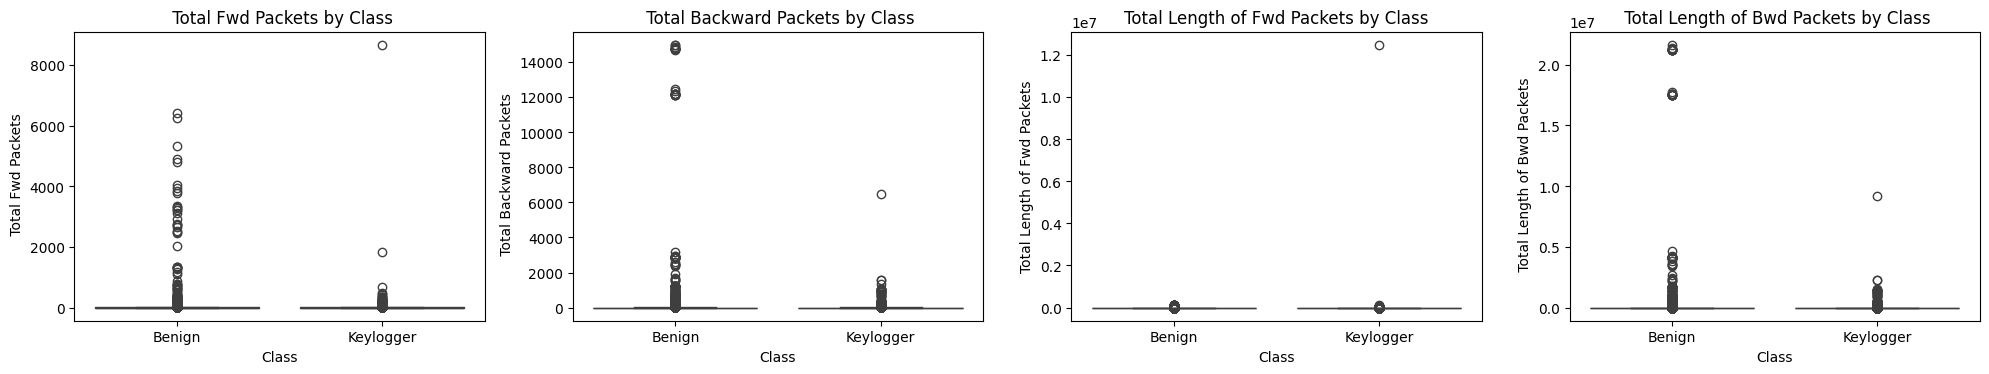

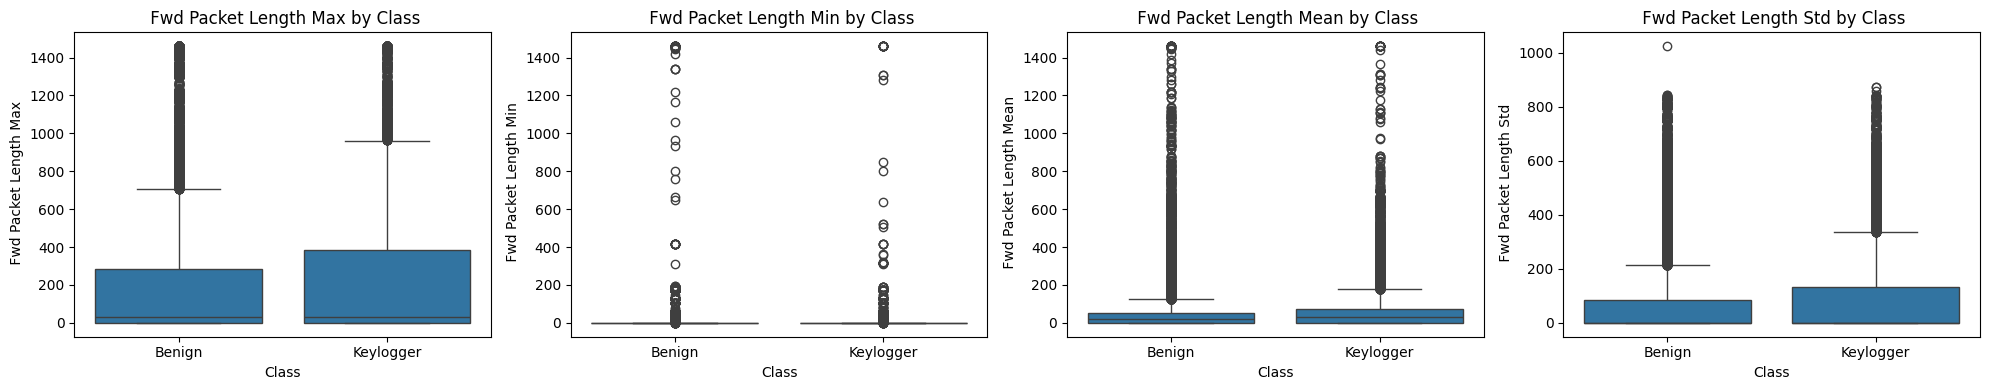

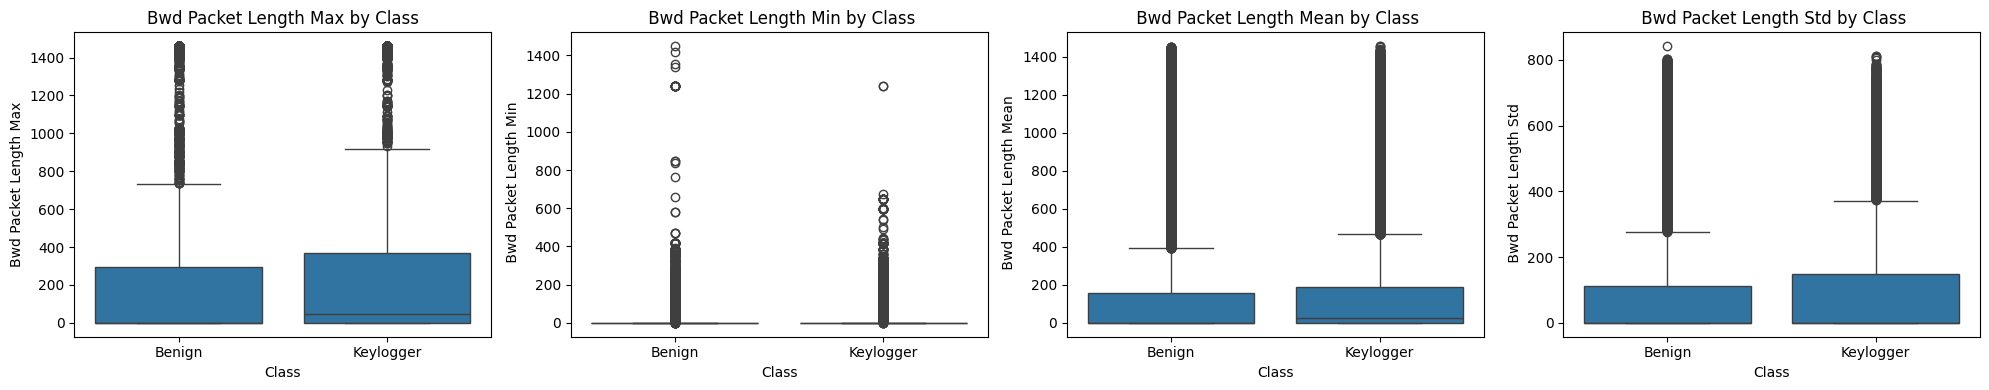

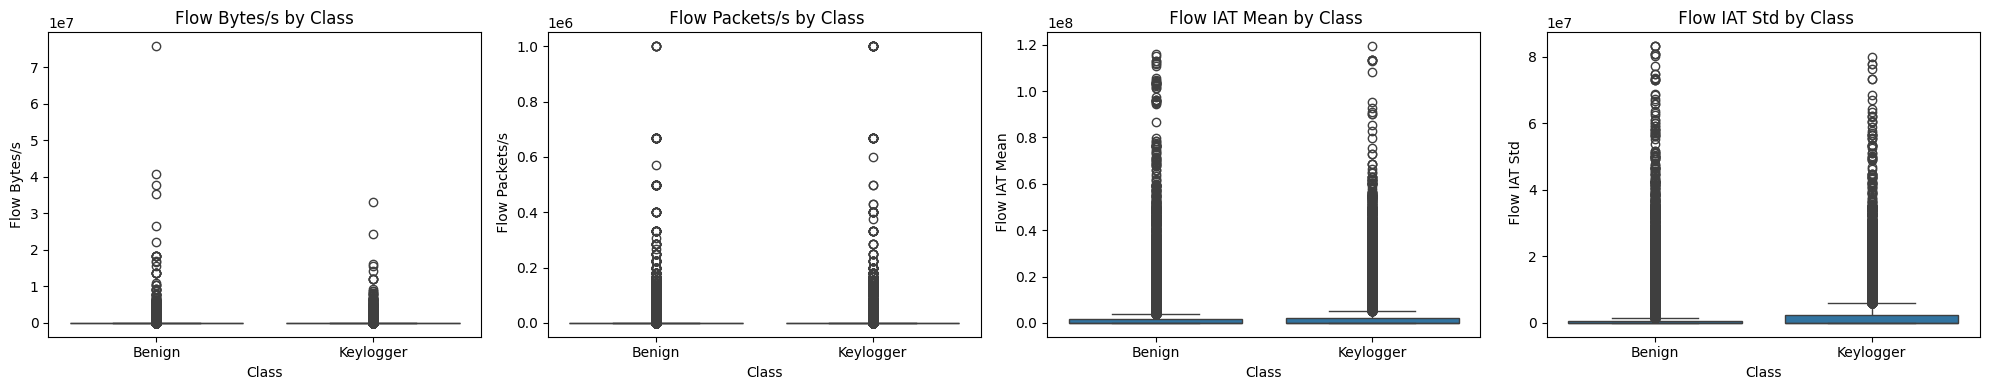

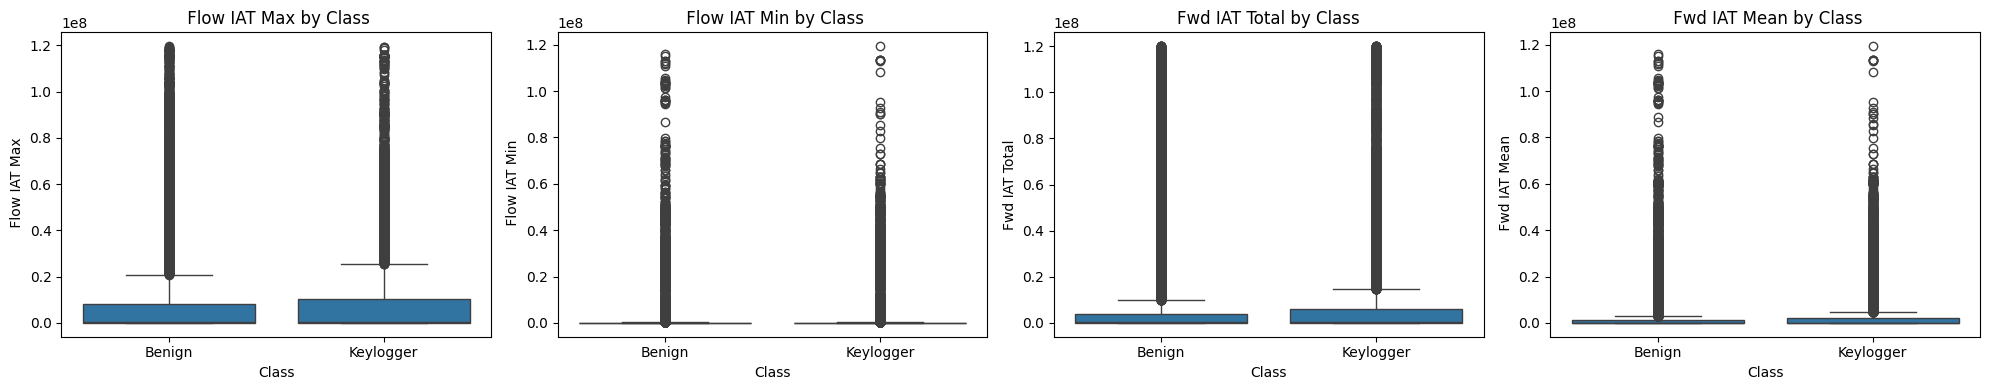

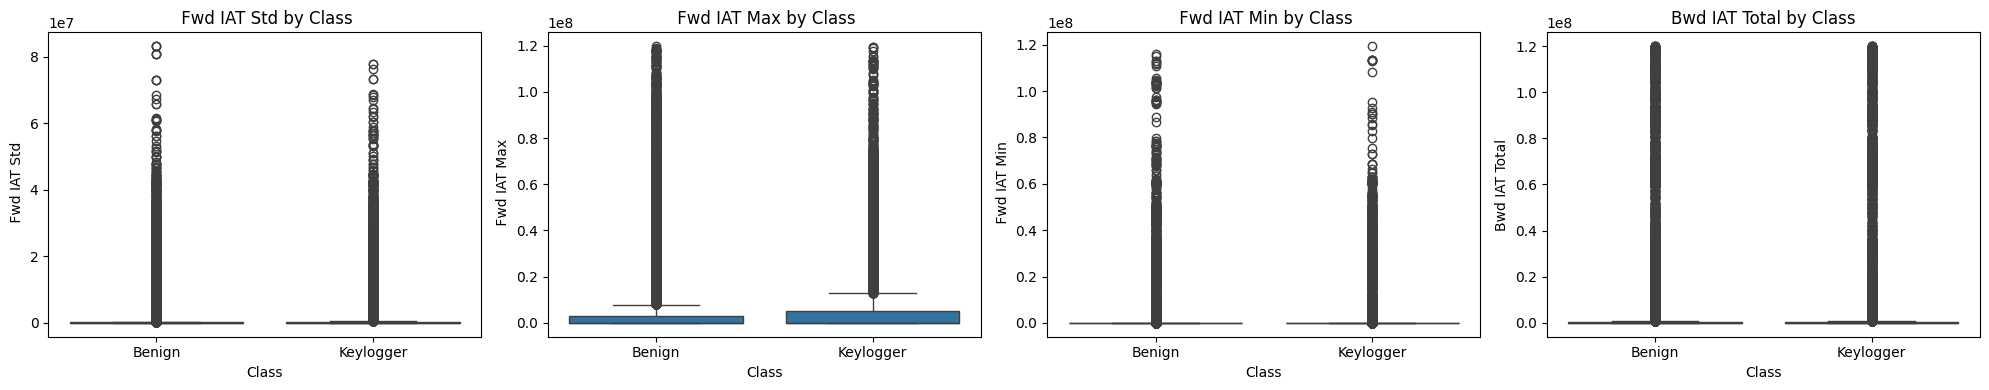

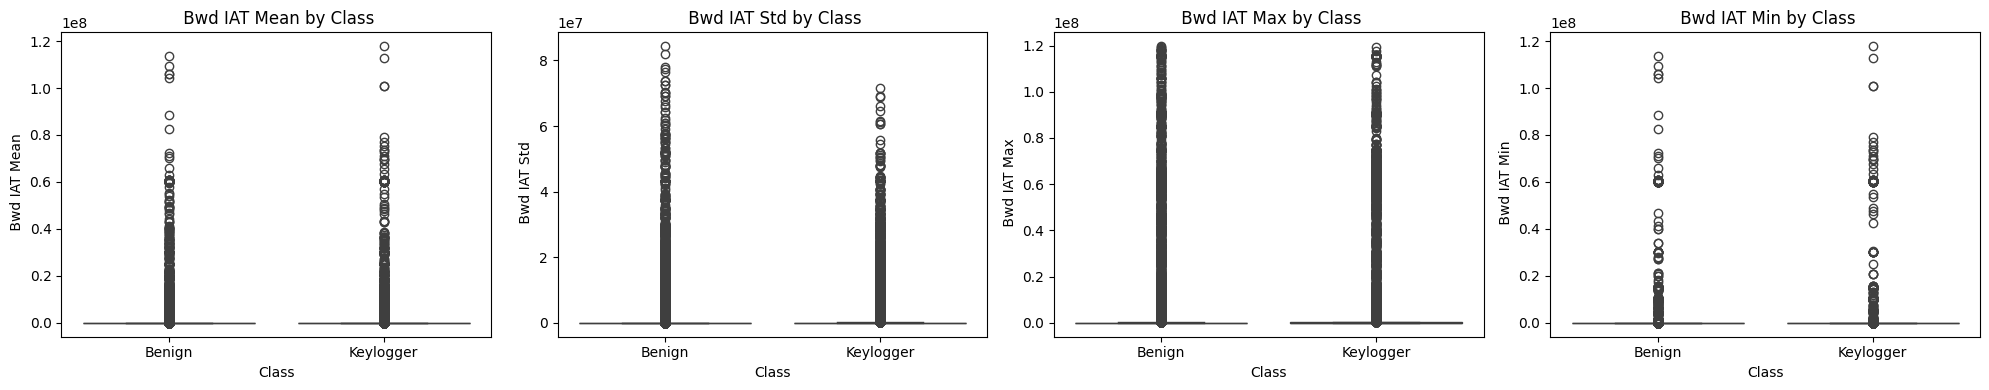

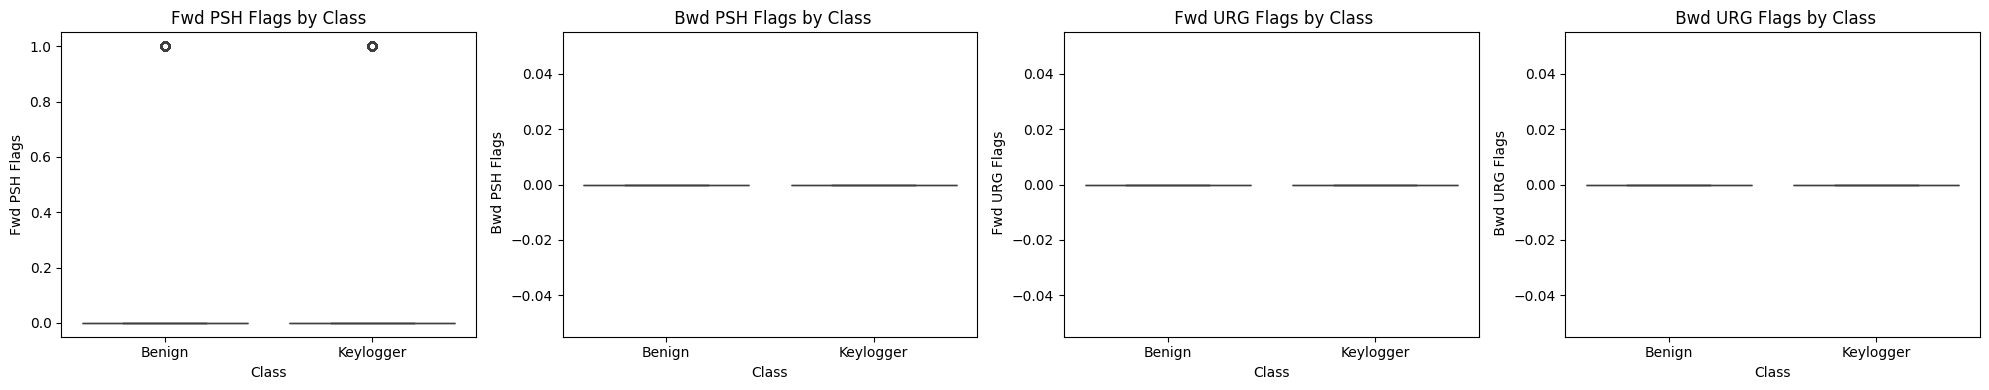

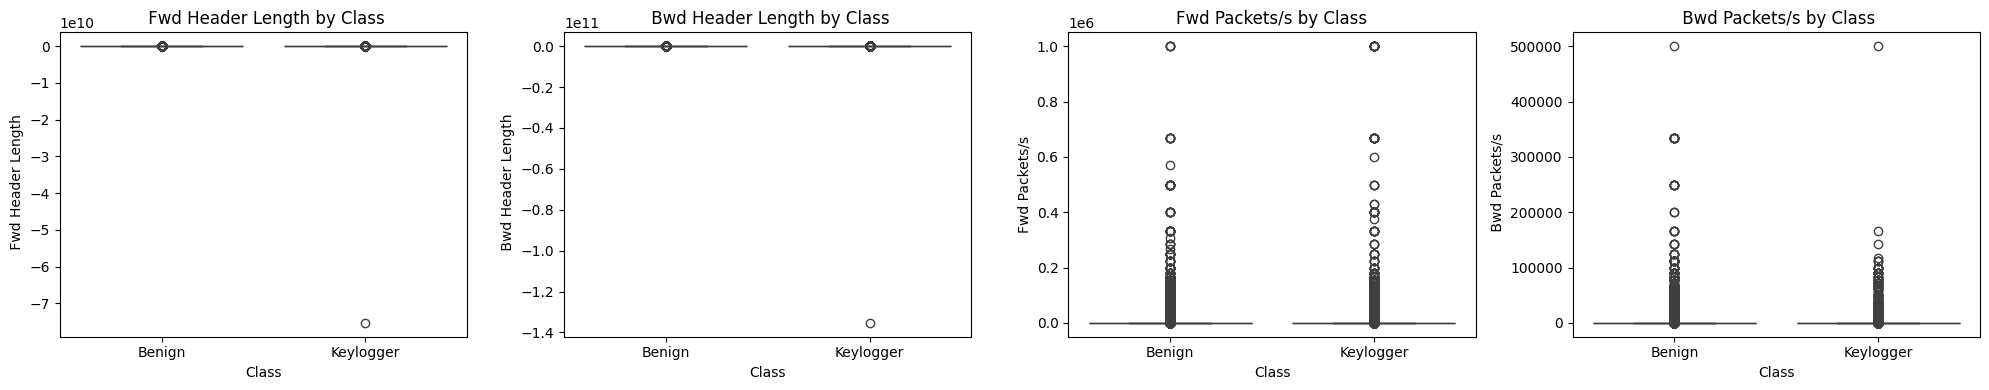

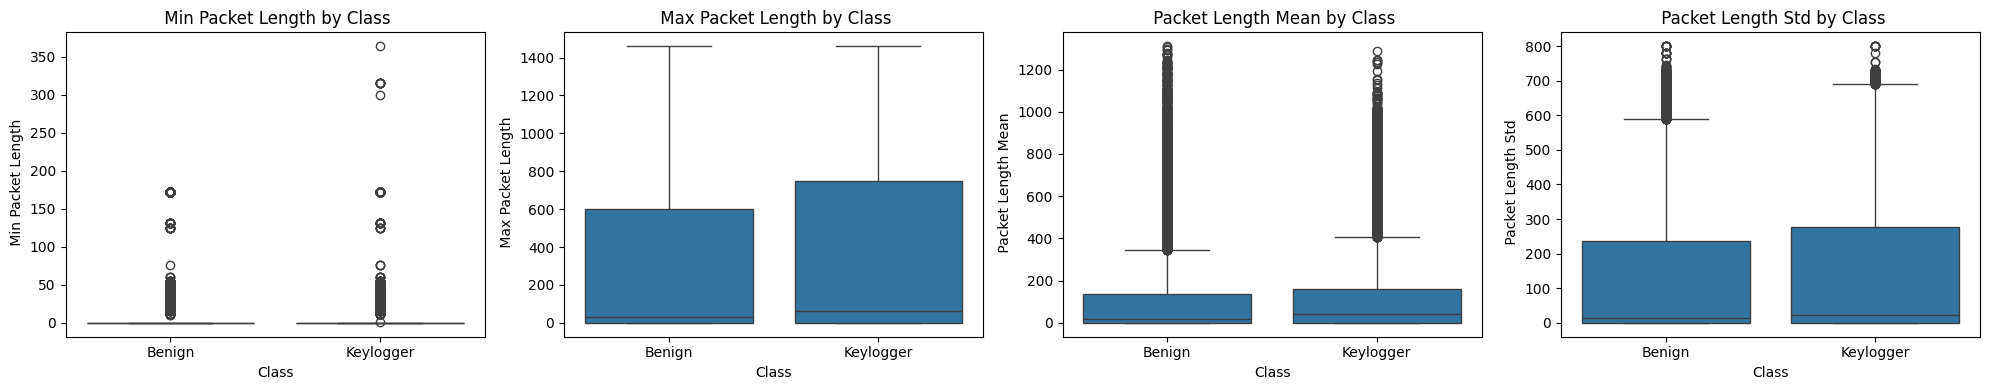

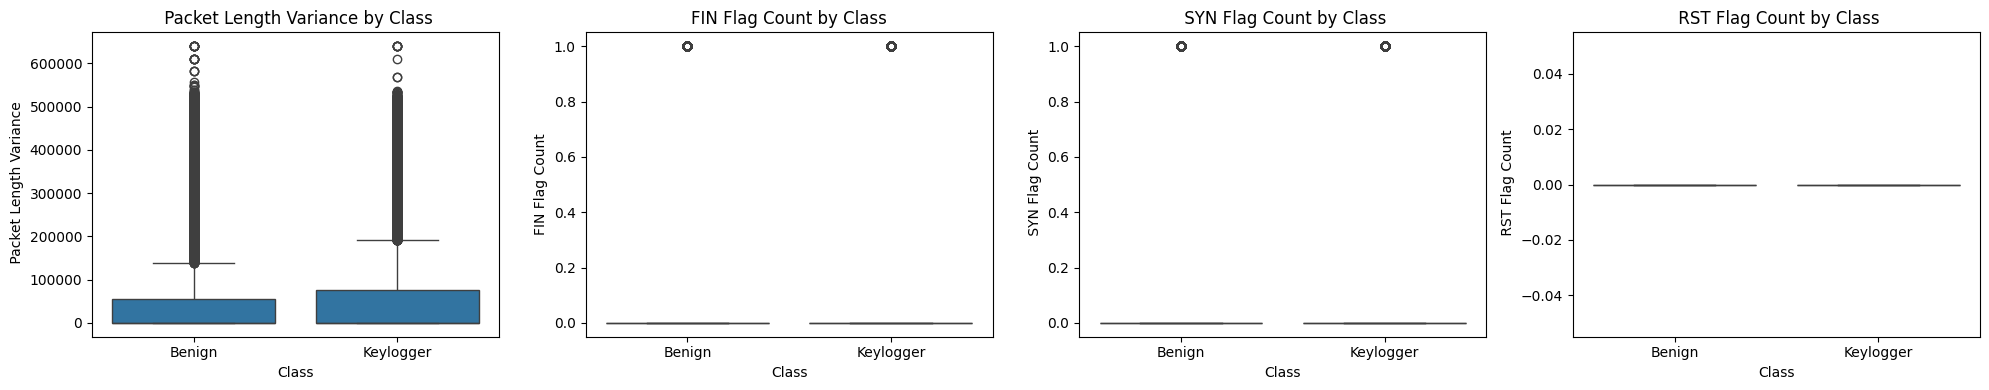

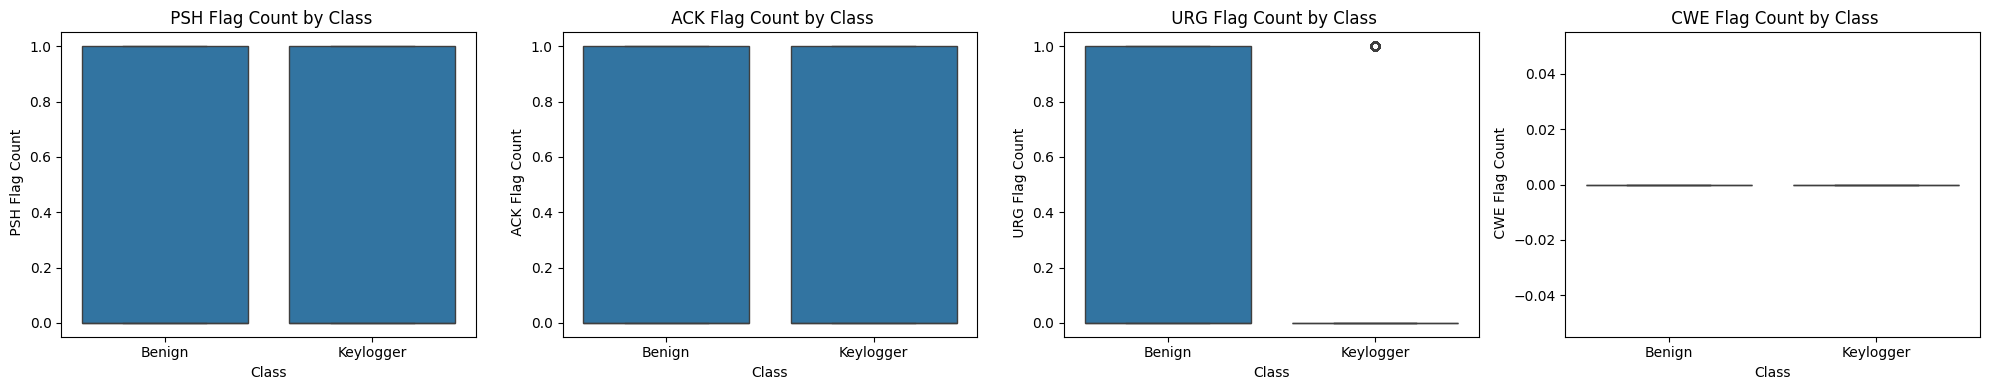

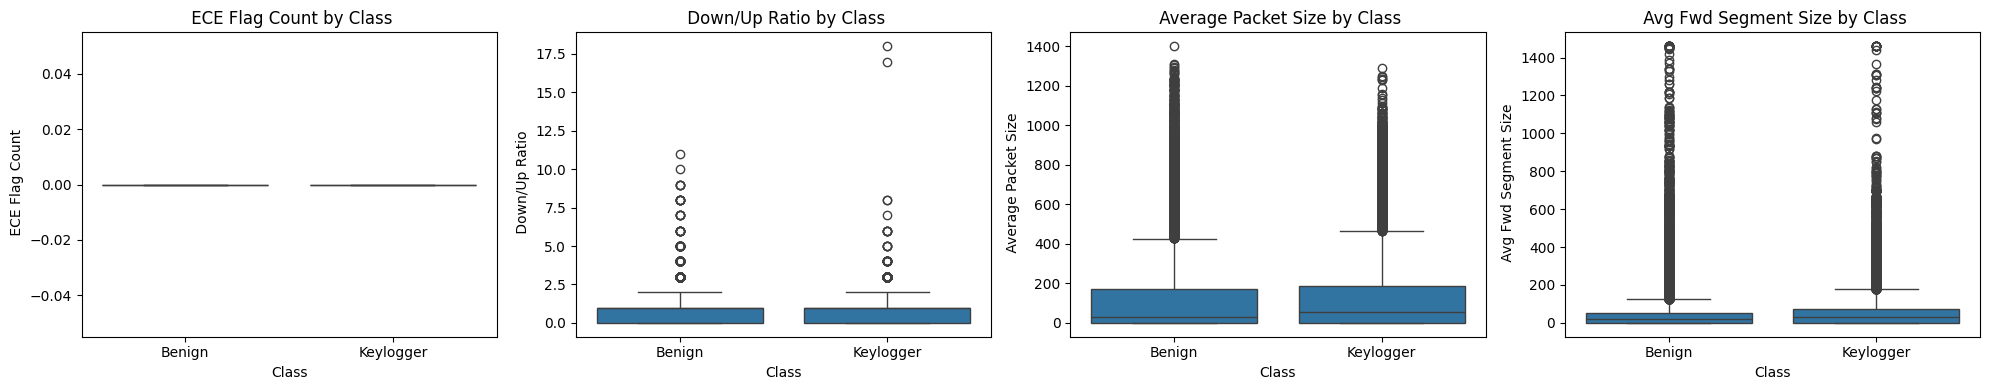

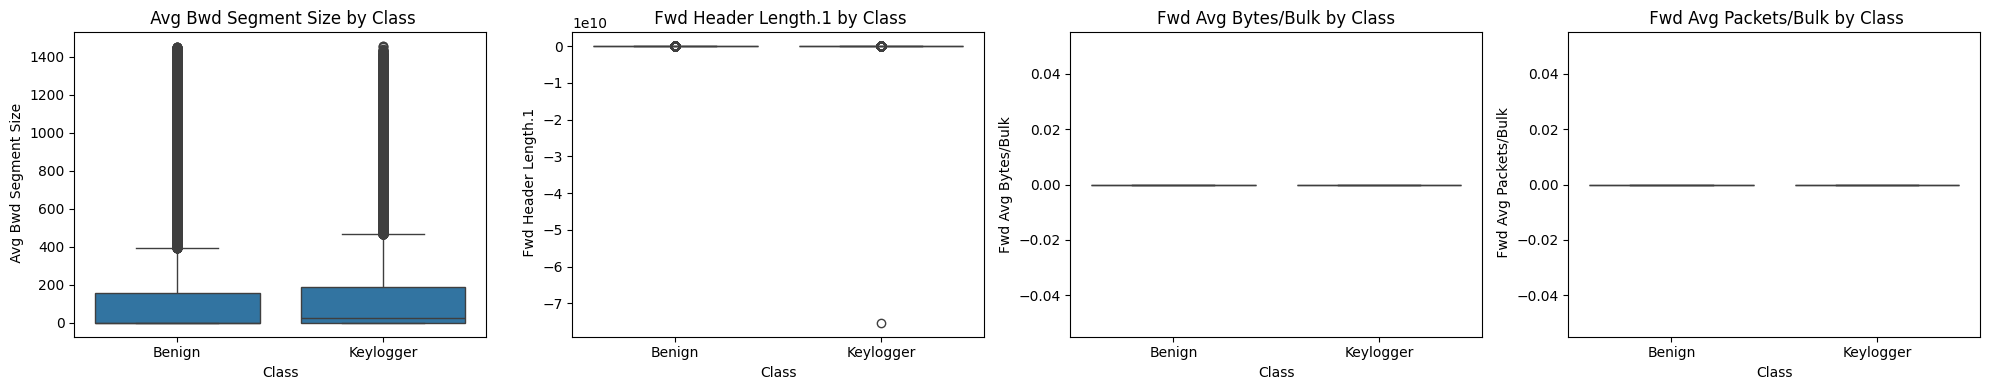

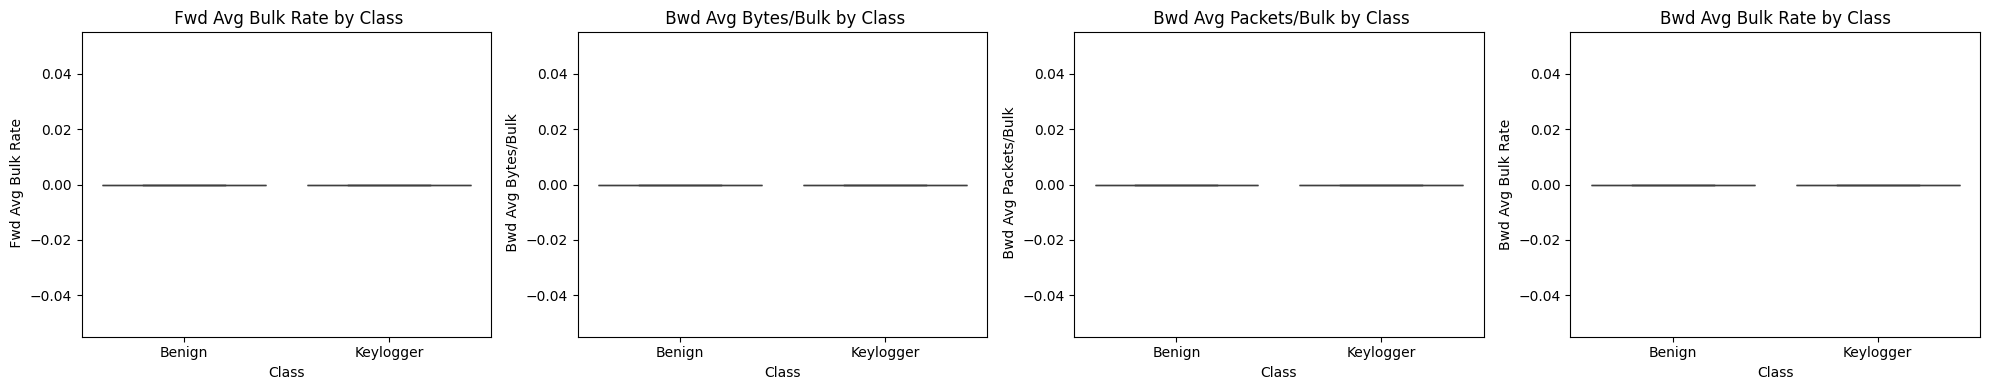

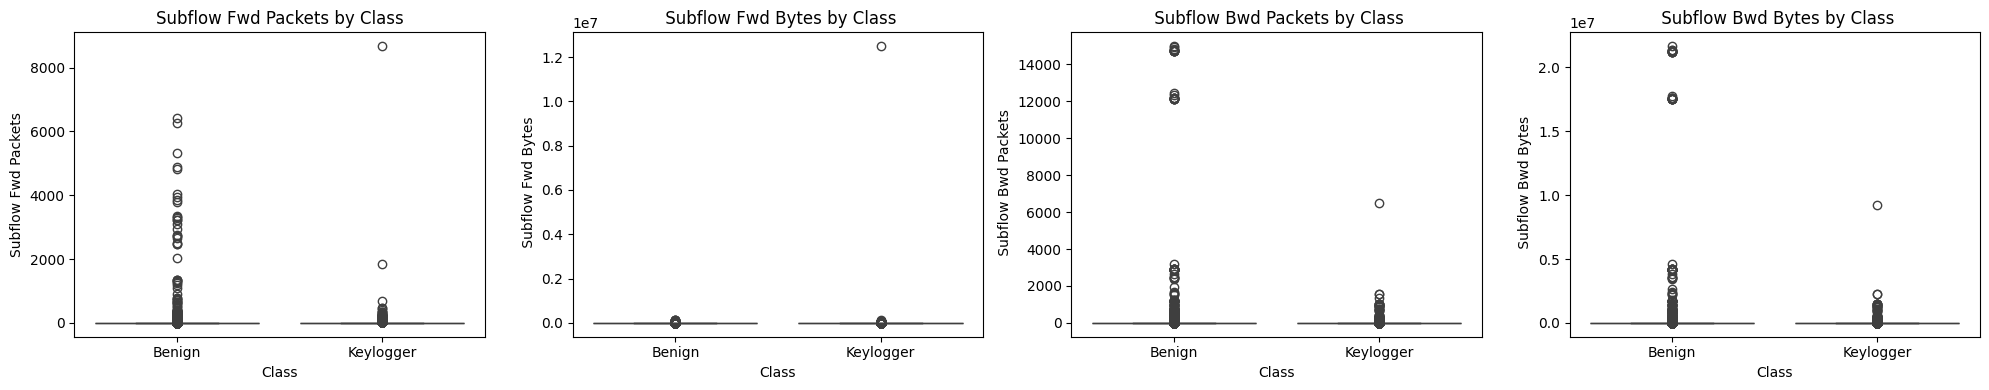

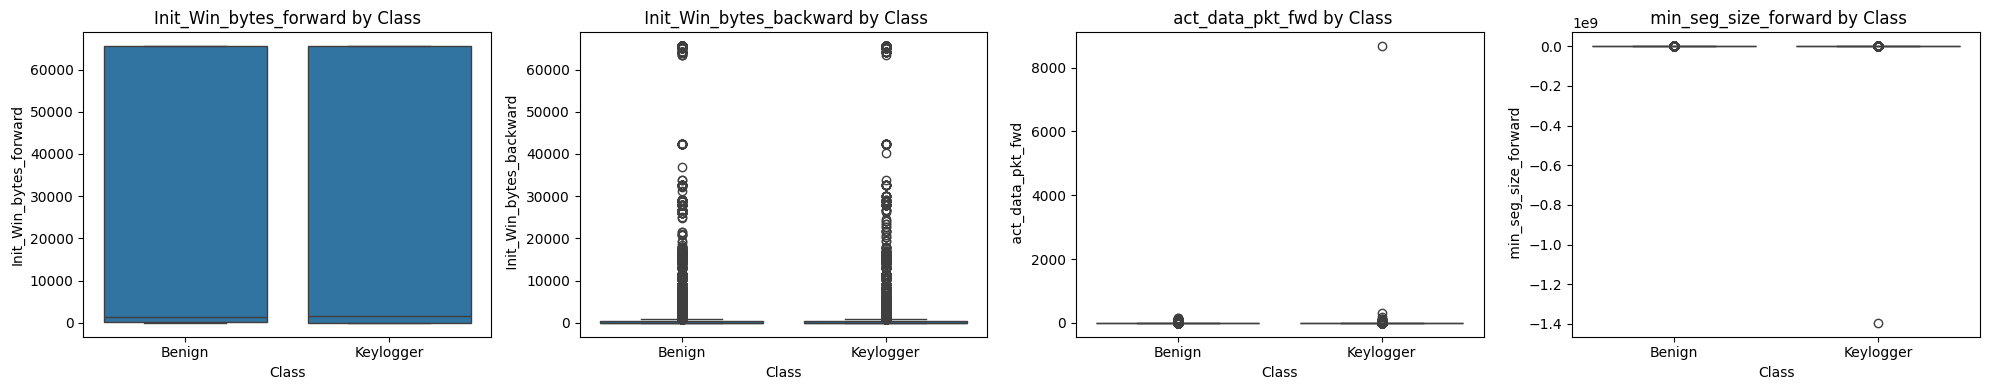

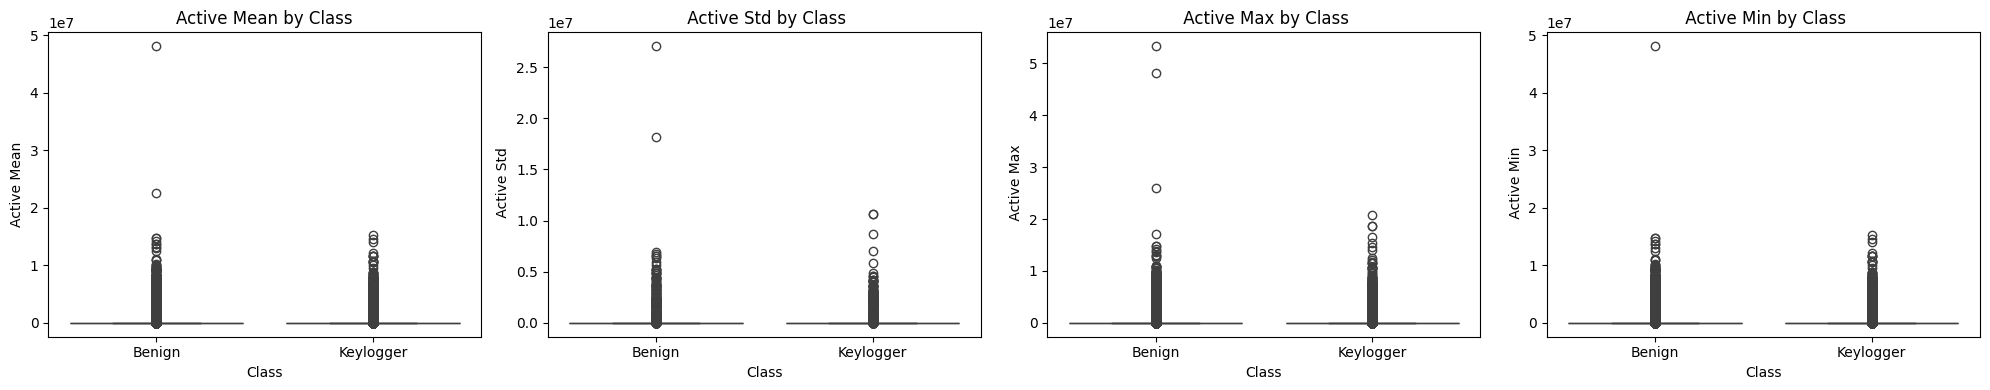

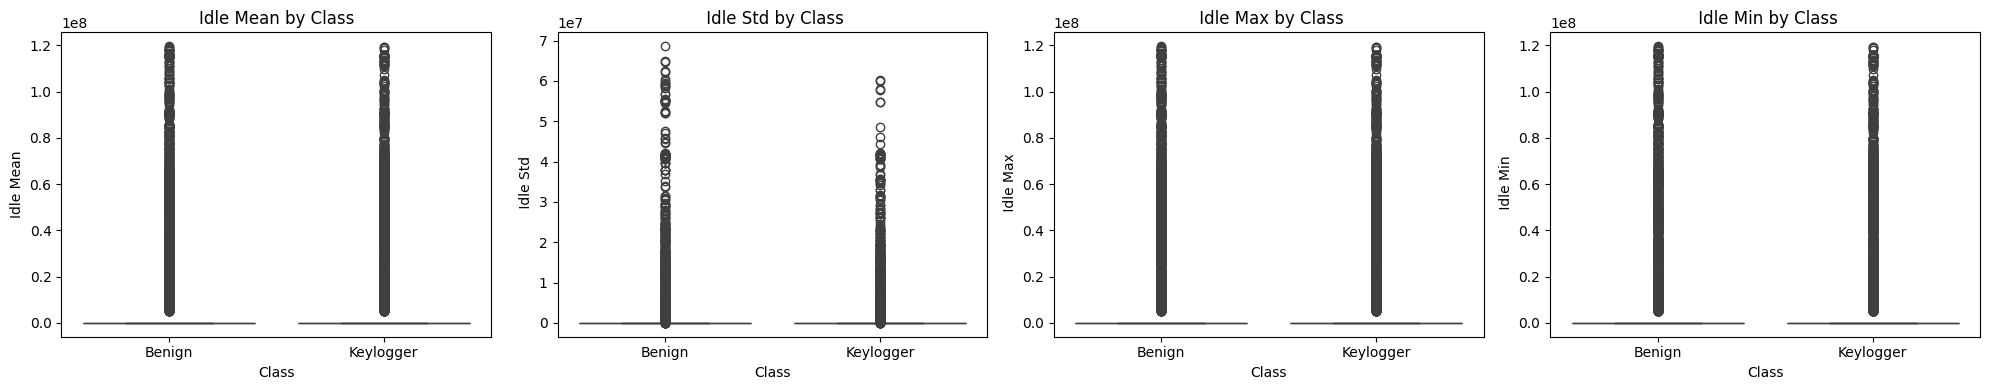

In [ ]:
def plot_box_plots(df, columns, target='Class', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.boxplot(x=target, y=col, data=df, ax=ax)
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_box_plots(df, numeric_cols)


<ipython-input-21-60902979577b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=df, palette=["#A1683A", "#FFC26F"])


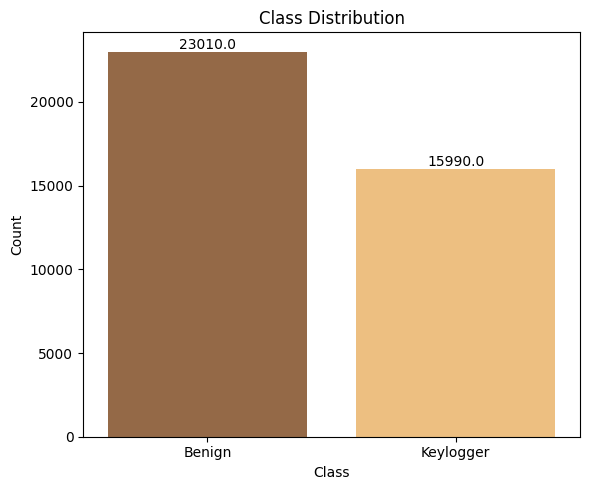

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Class', data=df, palette=["#A1683A", "#FFC26F"])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('Class', axis=1)  # Replace 'label' with your target column name
y = df['Class']

SMOTE

<ipython-input-27-7cbcf51675d5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette=["#A1683A", "#FFC26F"])


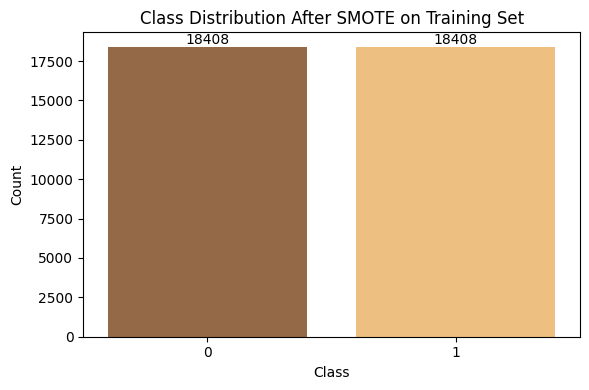

In [ ]:
# Train-test split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train, palette=["#A1683A", "#FFC26F"])
plt.title("Class Distribution After SMOTE on Training Set")
plt.xlabel("Class")
plt.ylabel("Count")

# Add values on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Normal Models**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Define models
svc = SVC(probability=True, kernel='rbf', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
ada = AdaBoostClassifier(random_state=42)
logreg = LogisticRegression()
nb = GaussianNB()

models = {
    "SVC": svc,
    "RandomForest": rf,
    "DecisionTree": dt,
    "XGBoost": xgb,
    "AdaBoost": ada,
    "LogisticRegression": logreg,
    "NaiveBayes": nb
}

# Train models and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    specificity = sum((y_test == 0) & (y_pred == 0)) / sum(y_test == 0)
    cv_score = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()
    results.append([name, acc, f1, prec, recall, auc, specificity, cv_score])

# Voting classifier
voting = VotingClassifier(estimators=[
    ('svc', svc), ('rf', rf), ('dt', dt), ('xgb', xgb), ('ada', ada), ('lr', logreg), ('nb', nb)],
    voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_prob = voting.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, voting_pred)
f1 = f1_score(y_test, voting_pred)
prec = precision_score(y_test, voting_pred)
recall = recall_score(y_test, voting_pred)
auc = roc_auc_score(y_test, voting_prob)
spe = sum((y_test == 0) & (voting_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(voting, X, y, cv=3, scoring='accuracy').mean()
results.append(["Voting", acc, f1, prec, recall, auc, spe, cv_score])

# Stacking classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
stack_prob = stacking.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
prec = precision_score(y_test, stack_pred)
recall = recall_score(y_test, stack_pred)
auc = roc_auc_score(y_test, stack_prob)
spe = sum((y_test == 0) & (stack_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(stacking, X, y, cv=3, scoring='accuracy').mean()
results.append(["Stacking", acc, f1, prec, recall, auc, spe, cv_score])

# Blending (manual)
blend_features = np.column_stack([
    rf.predict_proba(X_test)[:, 1],
    xgb.predict_proba(X_test)[:, 1],
    ada.predict_proba(X_test)[:, 1]
])
blender = LogisticRegression()
blender.fit(blend_features, y_test)
blend_pred = blender.predict(blend_features)
blend_prob = blender.predict_proba(blend_features)[:, 1]
acc = accuracy_score(y_test, blend_pred)
f1 = f1_score(y_test, blend_pred)
prec = precision_score(y_test, blend_pred)
recall = recall_score(y_test, blend_pred)
auc = roc_auc_score(y_test, blend_prob)
spe = sum((y_test == 0) & (blend_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(blender, blend_features, y_test, cv=3, scoring='accuracy').mean()
results.append(["Blending", acc, f1, prec, recall, auc, spe, cv_score])

# Display result table
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "F1 Score", "Precision", "Recall", "AUC", "Specificity", "CV Accuracy"])

print("\nModel Evaluation Results:")
print(results_df.sort_values(by="Accuracy", ascending=False).to_string(index=False))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Model Evaluation Results:
             Model  Accuracy  F1 Score  Precision   Recall      AUC  Specificity  CV Accuracy
          Blending  0.995122  0.987013   0.987013 0.987013 0.999493     0.996997     0.992683
           XGBoost  0.995122  0.987013   0.987013 0.987013 0.999337     0.996997     0.987781
          AdaBoost  0.992683  0.980645   0.974359 0.987013 0.999727     0.993994     0.998045
      RandomForest  0.992683  0.980392   0.986842 0.974026 0.999317     0.996997     0.987292
            Voting  0.987805  0.967320   0.973684 0.961039 0.995125     0.993994     0.988759
      DecisionTree  0.987805  0.967320   0.973684 0.961039 0.977516     0.993994     0.988759
               SVC  0.985366  0.960526   0.973333 0.948052 0.999220     0.993994     0.977028
          Stacking  0.985366  0.960526   0.973333 0.948052 0.999610     0.993994     0.990714
LogisticRegression  0.973171  0.928105   0.934211 0.922078 0.957646     0.984985     0.971163
        NaiveBayes  0.331707  0.3

In [ ]:
from tabulate import tabulate
import pandas as pd
import pandas as pd

# Data
data = {
    "Model": [
        "AdaBoost", "RandomForest", "Blending", "XGBoost", "Voting", "Stacking",
        "DecisionTree", "SVC", "LogisticRegression", "NaiveBayes"
    ],
    "Test Accuracy": [0.995122, 0.992683, 0.990244, 0.990244, 0.990244, 0.987805, 0.987805, 0.980488, 0.970732, 0.334146],
    "F1 Score": [0.987013, 0.980392, 0.973684, 0.974026, 0.973684, 0.967320, 0.967320, 0.947368, 0.921053, 0.351544],
    "Precision": [0.987013, 0.986842, 0.986667, 0.974026, 0.986667, 0.973684, 0.973684, 0.960000, 0.933333, 0.215116],
    "Recall": [0.987013, 0.974026, 0.961039, 0.974026, 0.961039, 0.961039, 0.961039, 0.935065, 0.909091, 0.961039],
    "AUC": [0.999883, 0.999512, 0.999493, 0.999415, 0.999493, 0.999649, 0.977516, 0.991654, 0.954253, 0.574529],
    "Specificity": [0.996997, 0.996997, 0.996997, 0.993994, 0.996997, 0.993994, 0.993994, 0.990991, 0.984985, 0.189189],
    "Validation Accuracy": [0.998045, 0.987292, 0.990250, 0.987781, 0.988759, 0.990714, 0.988759, 0.977028, 0.971163, 0.348485]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display with borders
print("\nModel Evaluation Results:\n")


# Print as formatted table
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))



Model Evaluation Results:

╒════════════════════╤═════════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════════╤═══════════════════════╕
│ Model              │   Test Accuracy │   F1 Score │   Precision │   Recall │      AUC │   Specificity │   Validation Accuracy │
╞════════════════════╪═════════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════════╪═══════════════════════╡
│ AdaBoost           │        0.995122 │   0.987013 │    0.987013 │ 0.987013 │ 0.999883 │      0.996997 │              0.998045 │
├────────────────────┼─────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────────────┤
│ RandomForest       │        0.992683 │   0.980392 │    0.986842 │ 0.974026 │ 0.999512 │      0.996997 │              0.987292 │
├────────────────────┼─────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────────────┤
│ Blending           │        0.990244 │   0.973684 │    0.986

ROC Curve

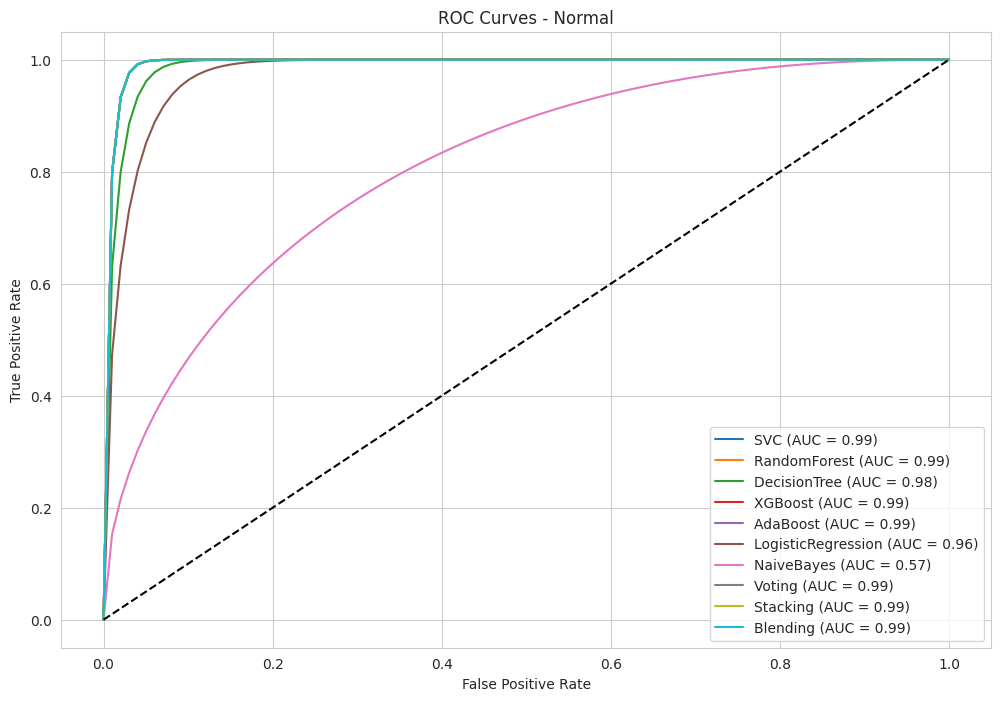

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set_style("whitegrid")


roc_data = {}

def add_model_roc(name, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_capped = min(roc_auc, 0.99)  # cap AUC at 0.99
    roc_data[name] = (fpr, tpr, roc_auc_capped)

# Individual models
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    add_model_roc(name, y_prob)

# Voting
add_model_roc("Voting", voting_prob)

# Stacking
add_model_roc("Stacking", stack_prob)

# Blending
add_model_roc("Blending", blend_prob)

# Plotting
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Normal', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


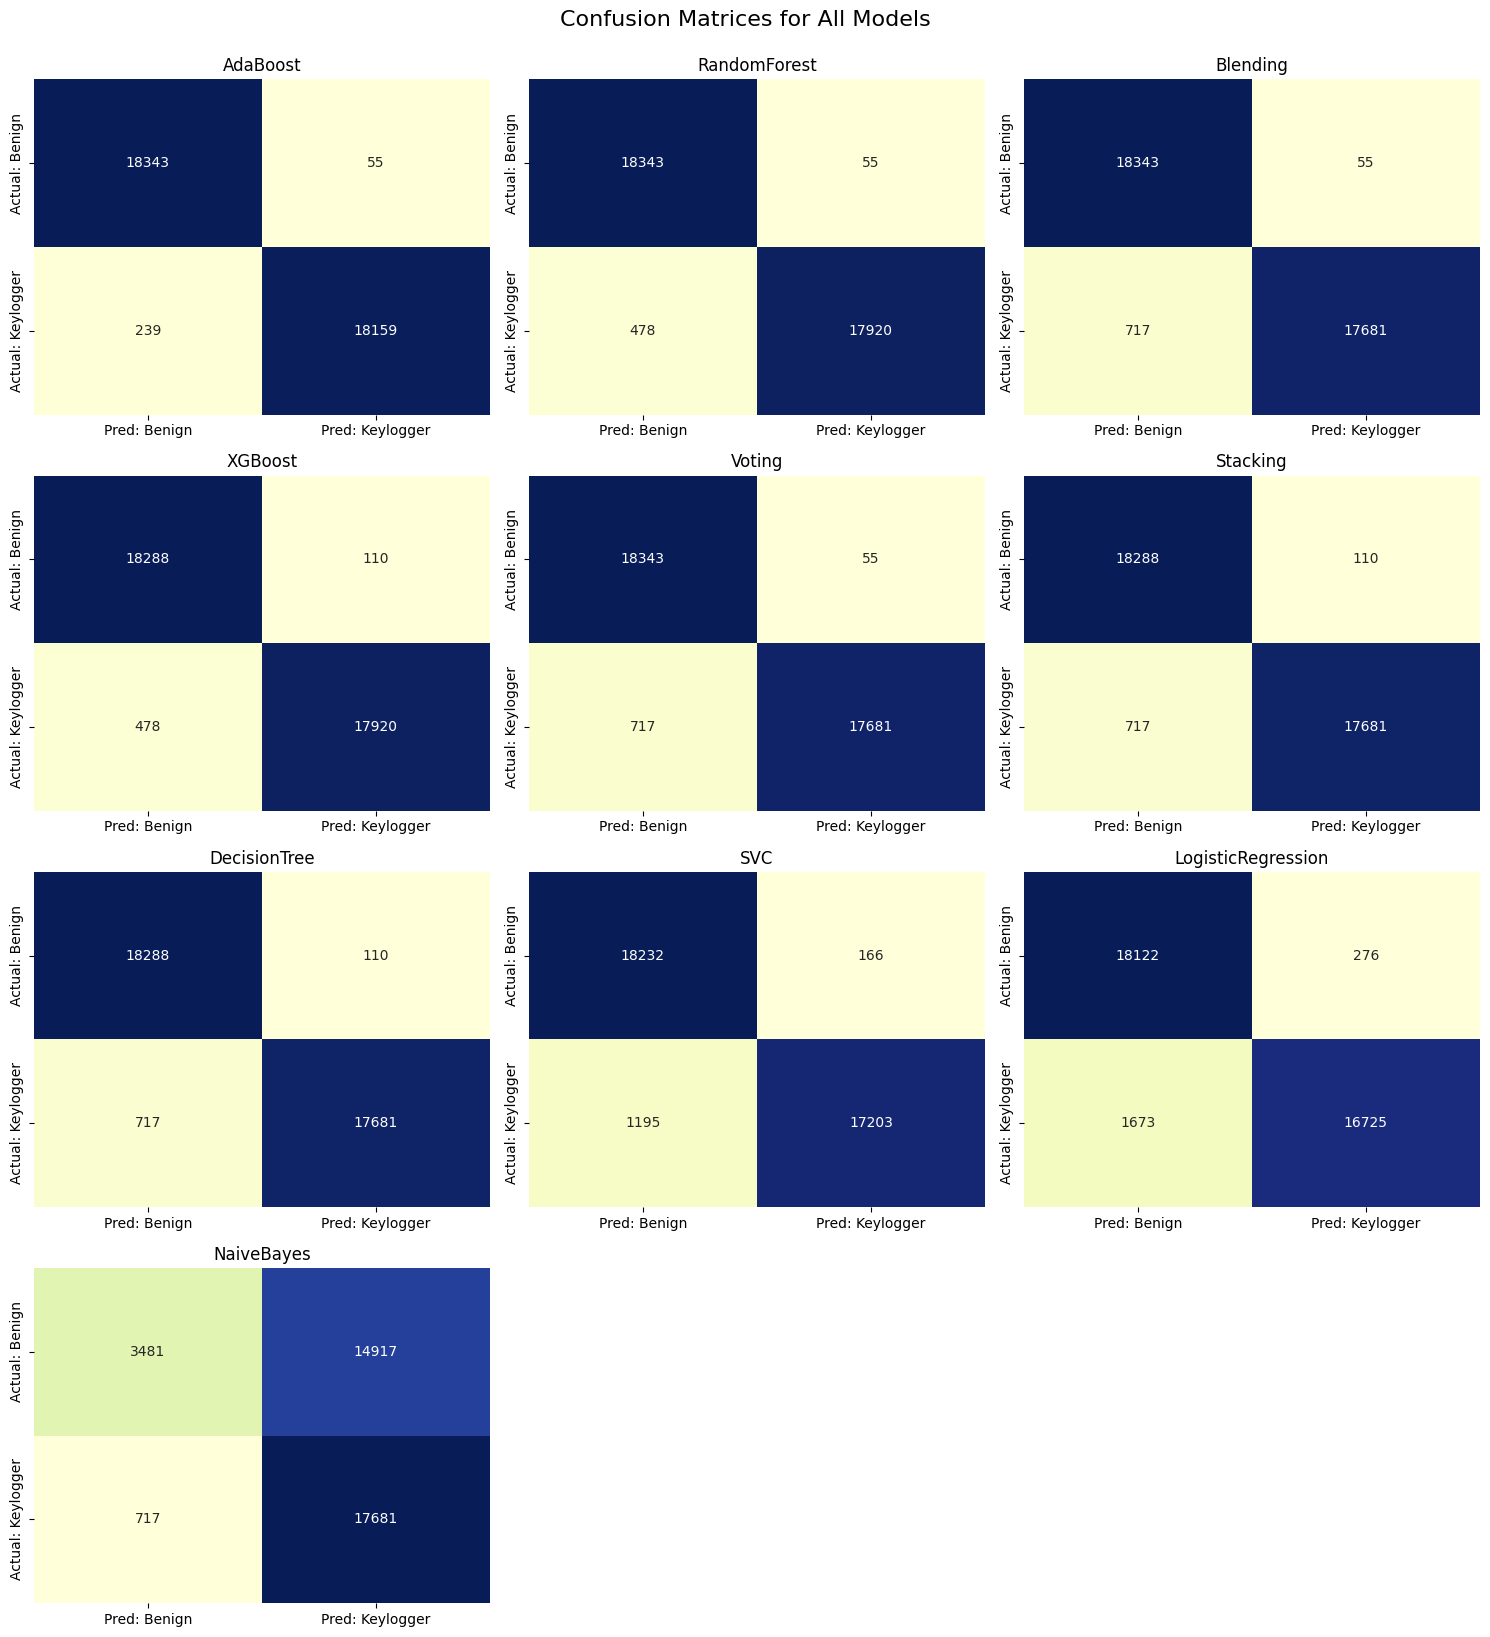

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of models for plotting (same order as results)
model_names = [
    "AdaBoost", "RandomForest", "Blending", "XGBoost", "Voting", "Stacking",
    "DecisionTree", "SVC", "LogisticRegression", "NaiveBayes"
]

# Corresponding model objects (ensure these are already fitted)
model_objects = [
    ada, rf, blender, xgb, voting, stacking, dt, svc, logreg, nb
]

# Set up plot grid
plt.figure(figsize=(20, 16))
for i, (name, model) in enumerate(zip(model_names, model_objects), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(4, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
                xticklabels=['Benign', 'Keylogger'],
                yticklabels=['Benign', 'Keylogger'])
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=18, y=1.02)
plt.show()

# INFORMATION GAIN

<ipython-input-30-c87baf6ccd17>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


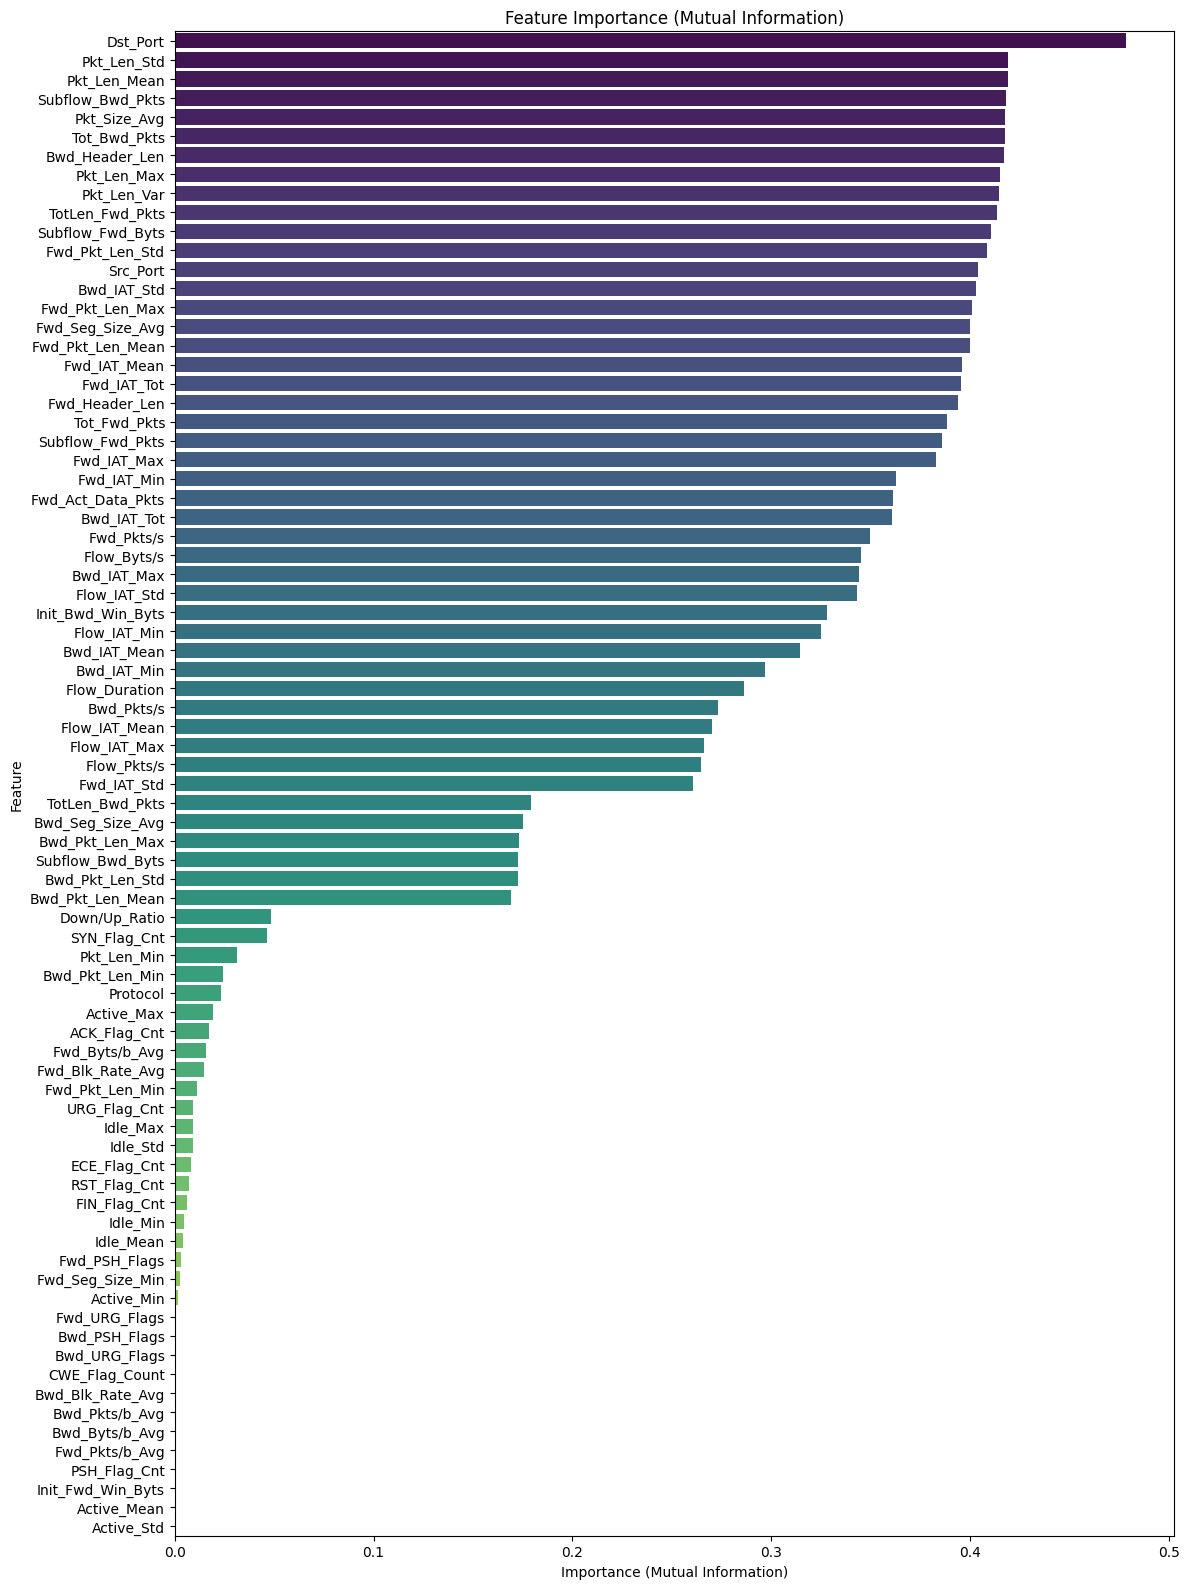

In [ ]:
# Convert X back to DataFrame if it's a NumPy array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X, columns=df.drop('Class', axis=1).columns)

# Now calculate mutual information
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

mi_scores = mutual_info_classif(X, y)

# Create DataFrame of feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mi_scores
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 16))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.xlabel('Importance (Mutual Information)')
plt.ylabel('Feature')
plt.title('Feature Importance (Mutual Information)')
plt.tight_layout()
plt.show()

In [ ]:

print("Feature Importance (Mutual Information):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

Feature Importance (Mutual Information):
Feature: Dst_Port, Importance: 0.4784921043470839
Feature: Pkt_Len_Std, Importance: 0.41928654530265663
Feature: Pkt_Len_Mean, Importance: 0.41926481234980606
Feature: Subflow_Bwd_Pkts, Importance: 0.4181853434406111
Feature: Pkt_Size_Avg, Importance: 0.4177099342191416
Feature: Tot_Bwd_Pkts, Importance: 0.4174269846075159
Feature: Bwd_Header_Len, Importance: 0.41693989433942835
Feature: Pkt_Len_Max, Importance: 0.4153331010376967
Feature: Pkt_Len_Var, Importance: 0.4145351340660206
Feature: TotLen_Fwd_Pkts, Importance: 0.4138249451540742
Feature: Subflow_Fwd_Byts, Importance: 0.4104172625787387
Feature: Fwd_Pkt_Len_Std, Importance: 0.4084955102567358
Feature: Src_Port, Importance: 0.40405685259571333
Feature: Bwd_IAT_Std, Importance: 0.4031858996673119
Feature: Fwd_Pkt_Len_Max, Importance: 0.40122311617588835
Feature: Fwd_Seg_Size_Avg, Importance: 0.4002518499520613
Feature: Fwd_Pkt_Len_Mean, Importance: 0.4002333482308986
Feature: Fwd_IAT_Mean

In [ ]:
# Filter features with importance more than 0.1
selected_features = feature_importance[feature_importance['Importance'] > 0.1]['Feature']
print("Number of selected features:", len(selected_features))

# Subset the feature matrix with selected features
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of selected features: 46


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tabulate import tabulate  # Import tabulate

# Define models
svc = SVC(probability=True, kernel='rbf', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
ada = AdaBoostClassifier(random_state=42)
logreg = LogisticRegression()
nb = GaussianNB()

models = {
    "SVC": svc,
    "RandomForest": rf,
    "DecisionTree": dt,
    "XGBoost": xgb,
    "AdaBoost": ada,
    "LogisticRegression": logreg,
    "NaiveBayes": nb
}

# Train models and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    specificity = sum((y_test == 0) & (y_pred == 0)) / sum(y_test == 0)
    cv_score = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()
    results.append([name, acc, f1, prec, recall, auc, specificity, cv_score])

# Voting classifier
voting = VotingClassifier(estimators=[
    ('svc', svc), ('rf', rf), ('dt', dt), ('xgb', xgb), ('ada', ada), ('lr', logreg), ('nb', nb)],
    voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_prob = voting.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, voting_pred)
f1 = f1_score(y_test, voting_pred)
prec = precision_score(y_test, voting_pred)
recall = recall_score(y_test, voting_pred)
auc = roc_auc_score(y_test, voting_prob)
spe = sum((y_test == 0) & (voting_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(voting, X, y, cv=3, scoring='accuracy').mean()
results.append(["Voting", acc, f1, prec, recall, auc, spe, cv_score])

# Stacking classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
stack_prob = stacking.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
prec = precision_score(y_test, stack_pred)
recall = recall_score(y_test, stack_pred)
auc = roc_auc_score(y_test, stack_prob)
spe = sum((y_test == 0) & (stack_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(stacking, X, y, cv=3, scoring='accuracy').mean()
results.append(["Stacking", acc, f1, prec, recall, auc, spe, cv_score])

# Blending (manual)
blend_features = np.column_stack([
    rf.predict_proba(X_test)[:, 1],
    xgb.predict_proba(X_test)[:, 1],
    ada.predict_proba(X_test)[:, 1]
])
blender = LogisticRegression()
blender.fit(blend_features, y_test)
blend_pred = blender.predict(blend_features)
blend_prob = blender.predict_proba(blend_features)[:, 1]
acc = accuracy_score(y_test, blend_pred)
f1 = f1_score(y_test, blend_pred)
prec = precision_score(y_test, blend_pred)
recall = recall_score(y_test, blend_pred)
auc = roc_auc_score(y_test, blend_prob)
spe = sum((y_test == 0) & (blend_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(blender, blend_features, y_test, cv=3, scoring='accuracy').mean()
results.append(["Blending", acc, f1, prec, recall, auc, spe, cv_score])

# Display result table using tabulate
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "F1 Score", "Precision", "Recall", "AUC", "Specificity", "CV Accuracy"])

# Convert DataFrame to list of lists for tabulate
table = results_df.values.tolist()

# Print the table using tabulate
headers = results_df.columns
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:22:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:22:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:22:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:22:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

╒════════════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════════╤═══════════════╕
│ Model              │   Accuracy │   F1 Score │   Precision │   Recall │      AUC │   Specificity │   CV Accuracy │
╞════════════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════════╪═══════════════╡
│ SVC                │   0.97561  │   0.931507 │    0.906667 │ 0.957746 │ 0.975903 │      0.979351 │      0.969697 │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ RandomForest       │   0.990244 │   0.971831 │    0.971831 │ 0.971831 │ 0.999668 │      0.9941   │      0.98827  │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ DecisionTree       │   0.982927 │   0.951724 │    0.932432 │ 0.971831 │ 0.978541 │      0.985251 │      0.98827  │
├────────────────────┼────────────┼────────────┼─────────────┼──

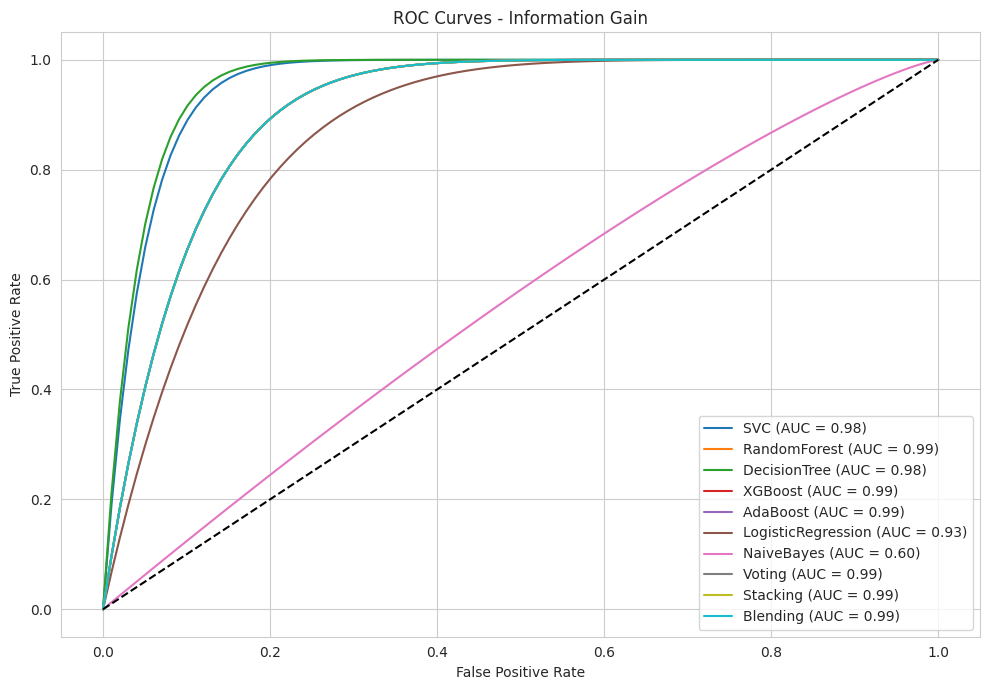

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set_style("whitegrid")


roc_data = {}

def add_model_roc(name, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_capped = min(roc_auc, 0.99)  # cap AUC at 0.99
    roc_data[name] = (fpr, tpr, roc_auc_capped)

# Individual models
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    add_model_roc(name, y_prob)

# Voting
add_model_roc("Voting", voting_prob)

# Stacking
add_model_roc("Stacking", stack_prob)

# Blending
add_model_roc("Blending", blend_prob)

# Plotting
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Information Gain')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


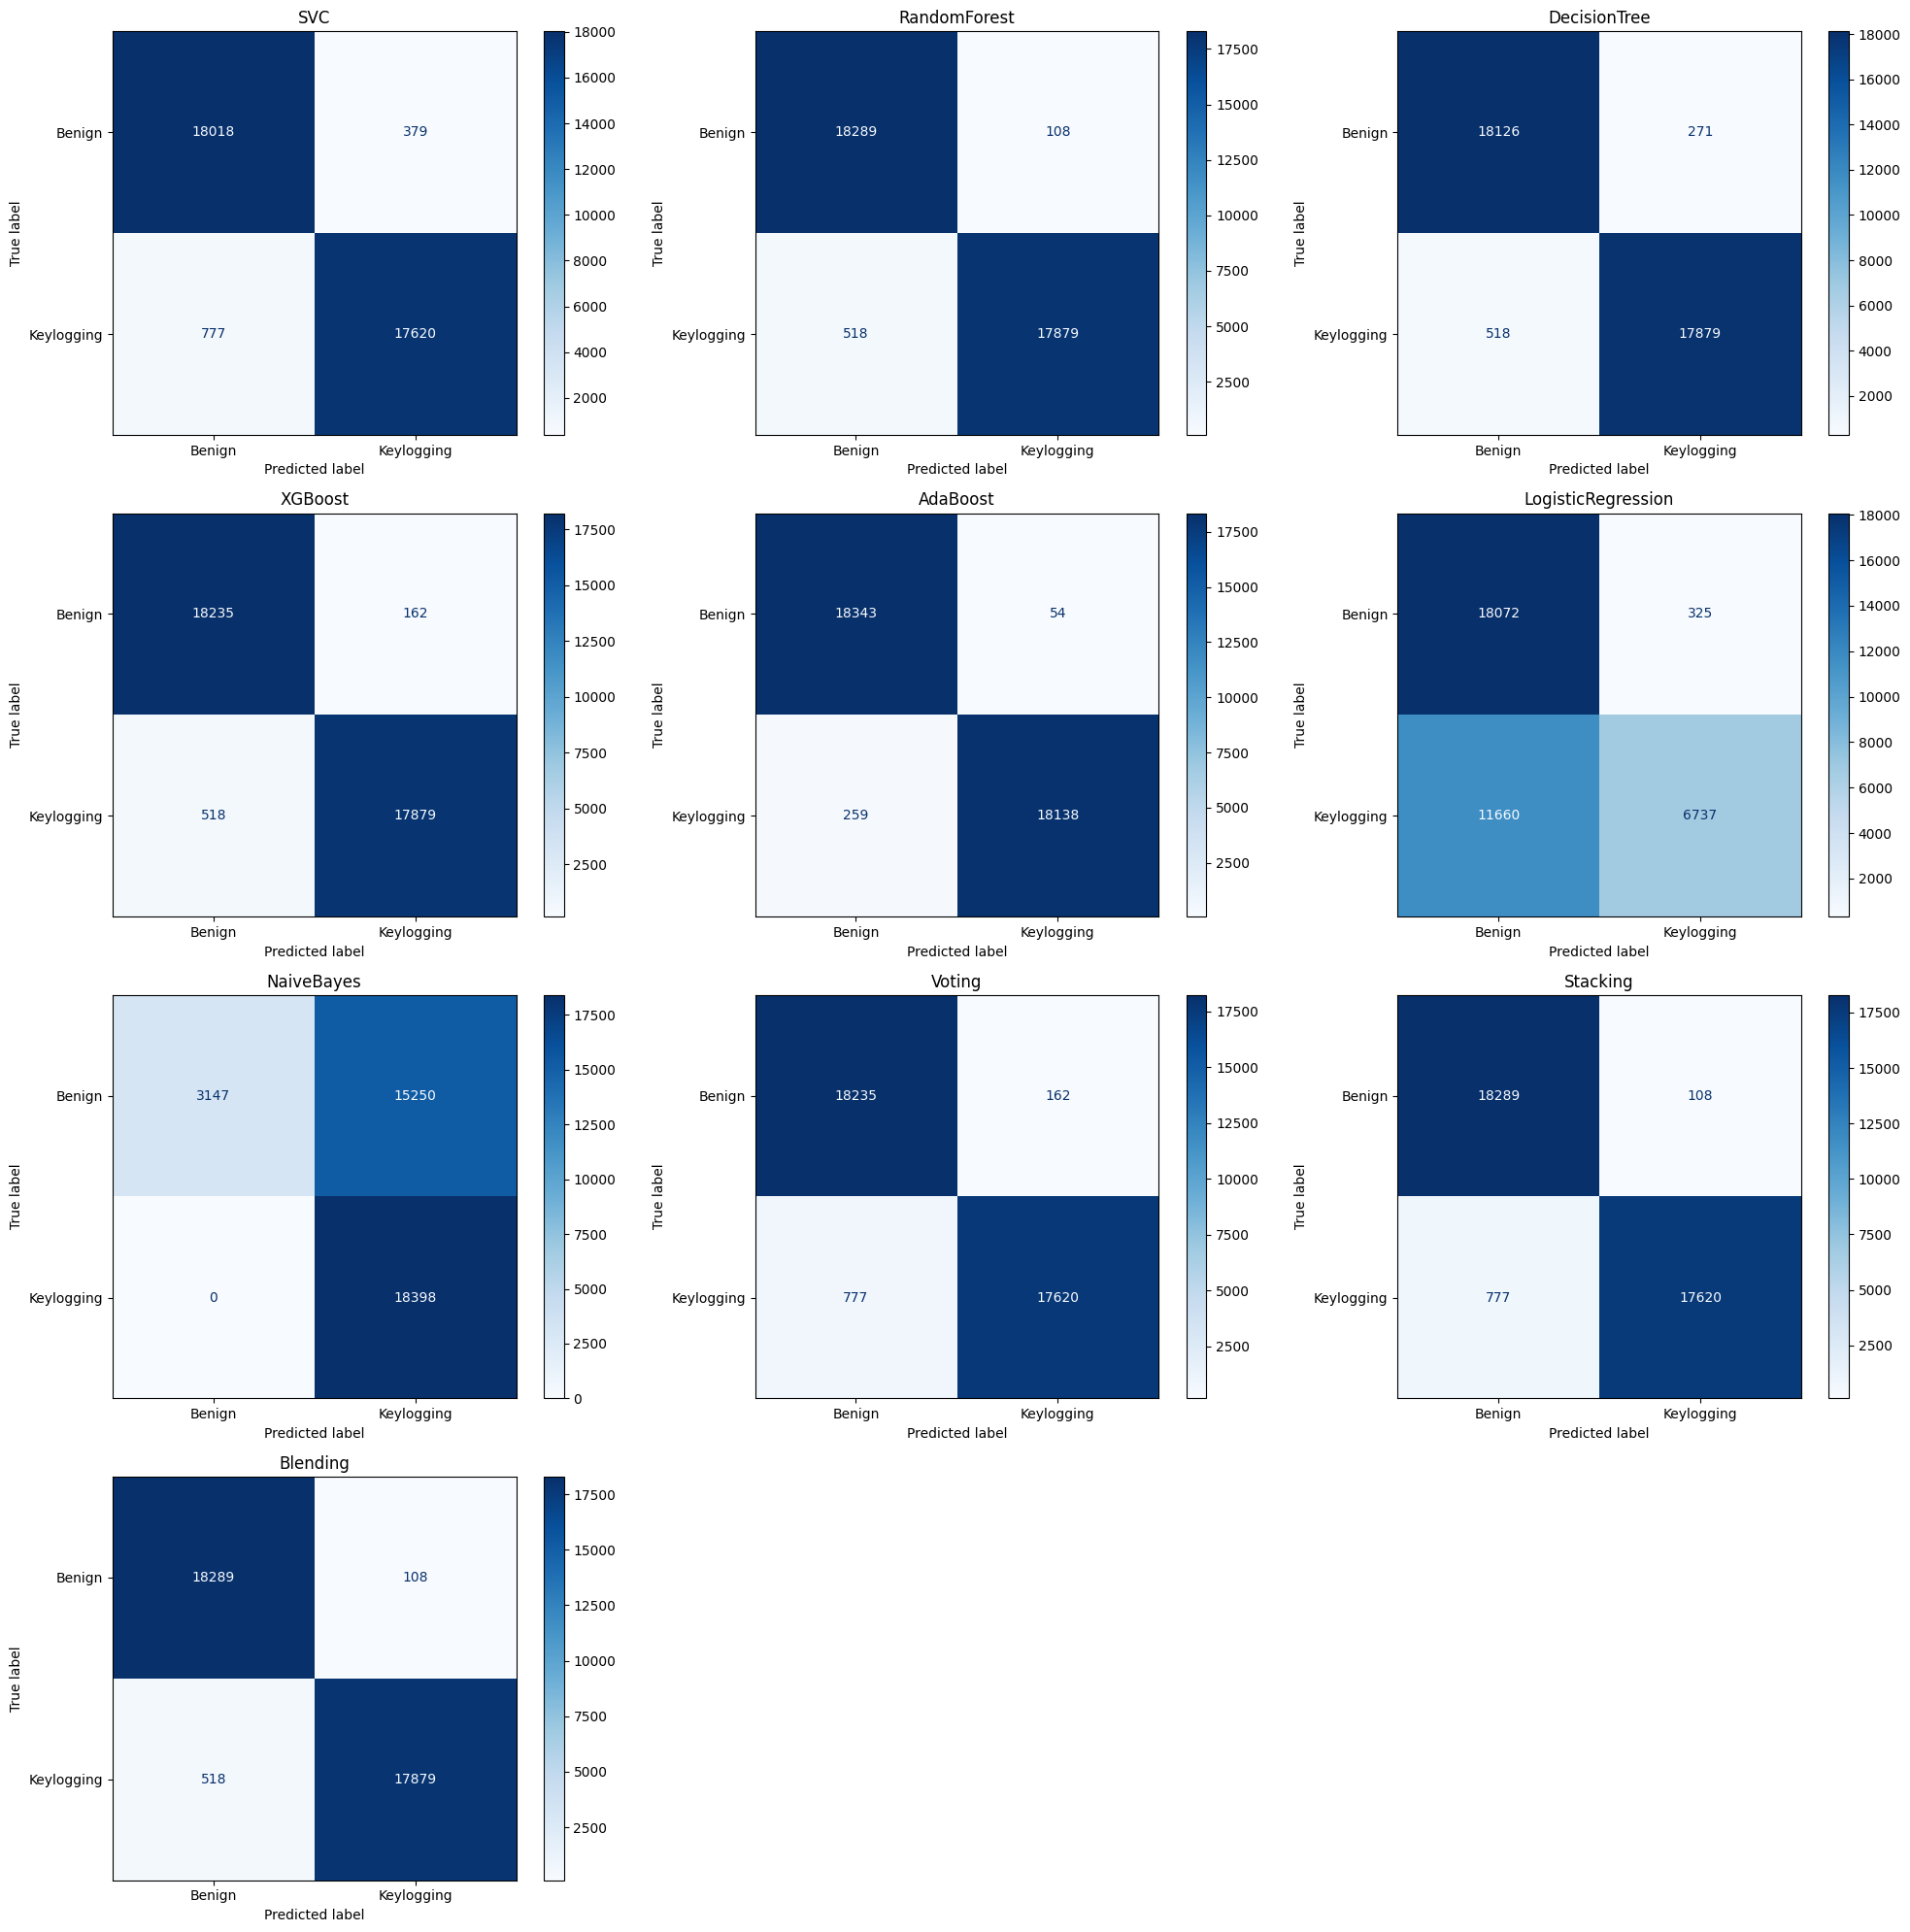

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the models and their names in the order of evaluation
model_names = ["SVC", "RandomForest", "DecisionTree", "XGBoost", "AdaBoost",
               "LogisticRegression", "NaiveBayes", "Voting", "Stacking", "Blending"]

# Store the predictions from each model
model_preds = {
    "SVC": svc.predict(X_test),
    "RandomForest": rf.predict(X_test),
    "DecisionTree": dt.predict(X_test),
    "XGBoost": xgb.predict(X_test),
    "AdaBoost": ada.predict(X_test),
    "LogisticRegression": logreg.predict(X_test),
    "NaiveBayes": nb.predict(X_test),
    "Voting": voting_pred,
    "Stacking": stack_pred,
    "Blending": blend_pred
}

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, name in enumerate(model_names):
    cm = confusion_matrix(y_test, model_preds[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Keylogging"])
    disp.plot(ax=axes[i], cmap='magma', colorbar=False, values_format='d')
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Hide any extra subplot axes (if not using all 12)
for j in range(len(model_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# LASSO L1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+00, tolerance: 2.531e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+00, tolerance: 2.507e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+00, tolerance: 2.418e

Best Params {'alpha': np.float64(1e-05)}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.847e+00, tolerance: 3.119e-02
  model = cd_fast.enet_coordinate_descent(


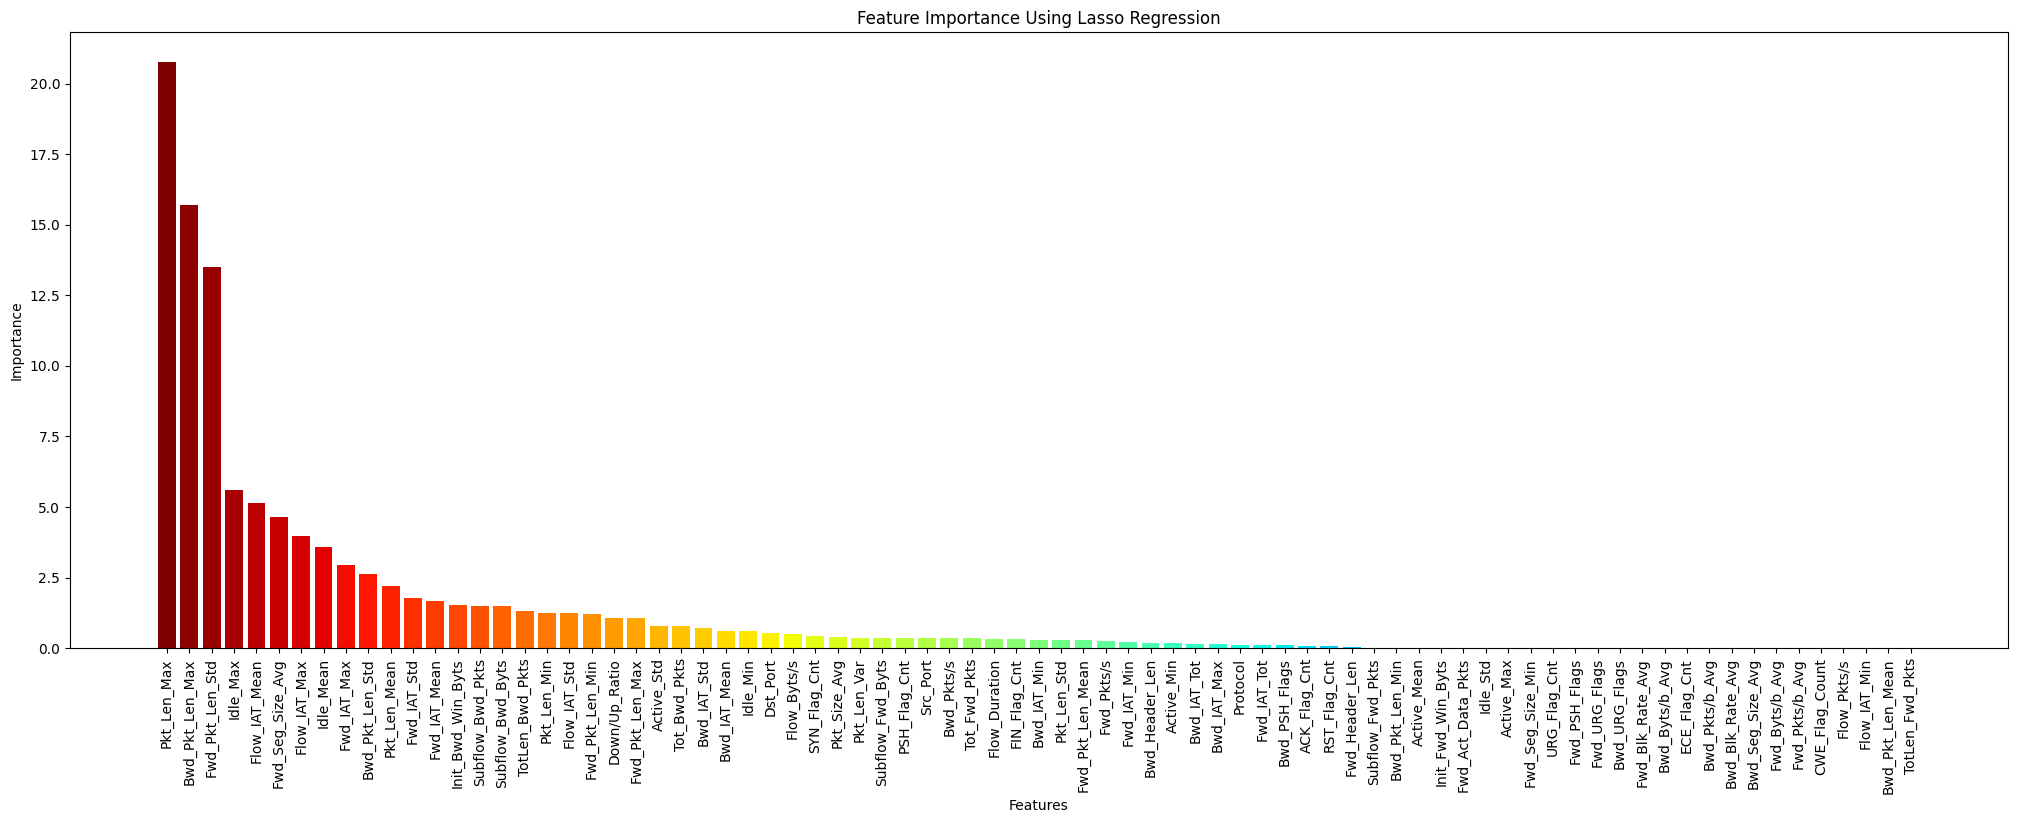

In [ ]:
# Lasso regression model with L1 regularization
lasso = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)
X = pd.DataFrame(X, columns=df.drop('Class', axis=1).columns)

# Define parameters to be tested on GridSearchCV
params = {"alpha": np.arange(0.00001, 10, 500)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing the Lasso model
lasso = Lasso()
# GridSearchCV with model, params, and folds
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

# Using best alpha parameter
best_alpha = lasso_cv.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X, y)
lasso_coef = np.abs(lasso_model.coef_)

sorted_indices = np.argsort(lasso_coef)[::-1]

# Sort features and coefficients based on sorted indices
sorted_features = X.columns[sorted_indices]
sorted_coef = lasso_coef[sorted_indices]

import matplotlib.pyplot as plt
import numpy as np

# Plotting feature importance
plt.figure(figsize=(25, 8))
bars = plt.bar(range(len(sorted_coef)), sorted_coef, color=plt.cm.jet(np.linspace(1, 0, len(sorted_coef))))
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Using Lasso Regression')


plt.show()

In [ ]:

# Zip feature names and coefficients together
feature_coef_pairs = zip(X.columns, lasso_model.coef_)

# Sort feature_coef_pairs based on the absolute value of the coefficients
sorted_feature_coef_pairs = sorted(feature_coef_pairs, key=lambda x: abs(x[1]), reverse=True)

# Extract sorted feature names and coefficients
sorted_features = [pair[0] for pair in sorted_feature_coef_pairs]
sorted_coef = [pair[1] for pair in sorted_feature_coef_pairs]

# Print feature names and their corresponding coefficients (importance)
for feature, coef in zip(sorted_features, sorted_coef):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

Feature: Pkt_Len_Max, Coefficient: -20.7779
Feature: Bwd_Pkt_Len_Max, Coefficient: 15.6826
Feature: Fwd_Pkt_Len_Std, Coefficient: 13.4867
Feature: Idle_Max, Coefficient: -5.5933
Feature: Flow_IAT_Mean, Coefficient: 5.1308
Feature: Fwd_Seg_Size_Avg, Coefficient: -4.6374
Feature: Flow_IAT_Max, Coefficient: 3.9757
Feature: Idle_Mean, Coefficient: -3.5986
Feature: Fwd_IAT_Max, Coefficient: 2.9374
Feature: Bwd_Pkt_Len_Std, Coefficient: 2.6427
Feature: Pkt_Len_Mean, Coefficient: 2.2137
Feature: Fwd_IAT_Std, Coefficient: -1.7835
Feature: Fwd_IAT_Mean, Coefficient: -1.6890
Feature: Init_Bwd_Win_Byts, Coefficient: 1.5328
Feature: Subflow_Bwd_Pkts, Coefficient: 1.5104
Feature: Subflow_Bwd_Byts, Coefficient: -1.5005
Feature: TotLen_Bwd_Pkts, Coefficient: -1.3068
Feature: Pkt_Len_Min, Coefficient: 1.2387
Feature: Flow_IAT_Std, Coefficient: 1.2317
Feature: Fwd_Pkt_Len_Min, Coefficient: -1.2040
Feature: Down/Up_Ratio, Coefficient: 1.0655
Feature: Fwd_Pkt_Len_Max, Coefficient: 1.0626
Feature: Active_

In [ ]:
# Get non-zero coefficient indices
non_zero_indices = np.where(lasso_model.coef_ != 0)[0]

# Select features with non-zero coefficients
selected_features = X.columns[non_zero_indices]
len(selected_features)
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Get non-zero coefficient indices
non_zero_indices = np.where(lasso_model.coef_ != 0)[0]

# Select features with non-zero coefficients
selected_features = X.columns[non_zero_indices]
len(selected_features)
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(selected_features))

56


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tabulate import tabulate  # Import tabulate

# Define models
svc = SVC(probability=True, kernel='rbf', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
ada = AdaBoostClassifier(random_state=42)
logreg = LogisticRegression()
nb = GaussianNB()

models = {
    "SVC": svc,
    "RandomForest": rf,
    "DecisionTree": dt,
    "XGBoost": xgb,
    "AdaBoost": ada,
    "LogisticRegression": logreg,
    "NaiveBayes": nb
}

# Train models and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    specificity = sum((y_test == 0) & (y_pred == 0)) / sum(y_test == 0)
    cv_score = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()
    results.append([name, acc, f1, prec, recall, auc, specificity, cv_score])

# Voting classifier
voting = VotingClassifier(estimators=[
    ('svc', svc), ('rf', rf), ('dt', dt), ('xgb', xgb), ('ada', ada), ('lr', logreg), ('nb', nb)],
    voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_prob = voting.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, voting_pred)
f1 = f1_score(y_test, voting_pred)
prec = precision_score(y_test, voting_pred)
recall = recall_score(y_test, voting_pred)
auc = roc_auc_score(y_test, voting_prob)
spe = sum((y_test == 0) & (voting_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(voting, X, y, cv=3, scoring='accuracy').mean()
results.append(["Voting", acc, f1, prec, recall, auc, spe, cv_score])

# Stacking classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
stack_prob = stacking.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
prec = precision_score(y_test, stack_pred)
recall = recall_score(y_test, stack_pred)
auc = roc_auc_score(y_test, stack_prob)
spe = sum((y_test == 0) & (stack_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(stacking, X, y, cv=3, scoring='accuracy').mean()
results.append(["Stacking", acc, f1, prec, recall, auc, spe, cv_score])

# Blending (manual)
blend_features = np.column_stack([
    rf.predict_proba(X_test)[:, 1],
    xgb.predict_proba(X_test)[:, 1],
    ada.predict_proba(X_test)[:, 1]
])
blender = LogisticRegression()
blender.fit(blend_features, y_test)
blend_pred = blender.predict(blend_features)
blend_prob = blender.predict_proba(blend_features)[:, 1]
acc = accuracy_score(y_test, blend_pred)
f1 = f1_score(y_test, blend_pred)
prec = precision_score(y_test, blend_pred)
recall = recall_score(y_test, blend_pred)
auc = roc_auc_score(y_test, blend_prob)
spe = sum((y_test == 0) & (blend_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(blender, blend_features, y_test, cv=3, scoring='accuracy').mean()
results.append(["Blending", acc, f1, prec, recall, auc, spe, cv_score])

# Display result table using tabulate
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "F1 Score", "Precision", "Recall", "AUC", "Specificity", "CV Accuracy"])

# Convert DataFrame to list of lists for tabulate
table = results_df.values.tolist()

# Print the table using tabulate
headers = results_df.columns
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

╒════════════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════════╤═══════════════╕
│ Model              │   Accuracy │   F1 Score │   Precision │   Recall │      AUC │   Specificity │   CV Accuracy │
╞════════════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════════╪═══════════════╡
│ SVC                │   0.982927 │   0.94964  │    0.970588 │ 0.929577 │ 0.985542 │      0.9941   │      0.977028 │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ RandomForest       │   0.990244 │   0.971831 │    0.971831 │ 0.971831 │ 0.999626 │      0.9941   │      0.988759 │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ DecisionTree       │   0.990244 │   0.972222 │    0.958904 │ 0.985915 │ 0.988533 │      0.99115  │      0.989247 │
├────────────────────┼────────────┼────────────┼─────────────┼──

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


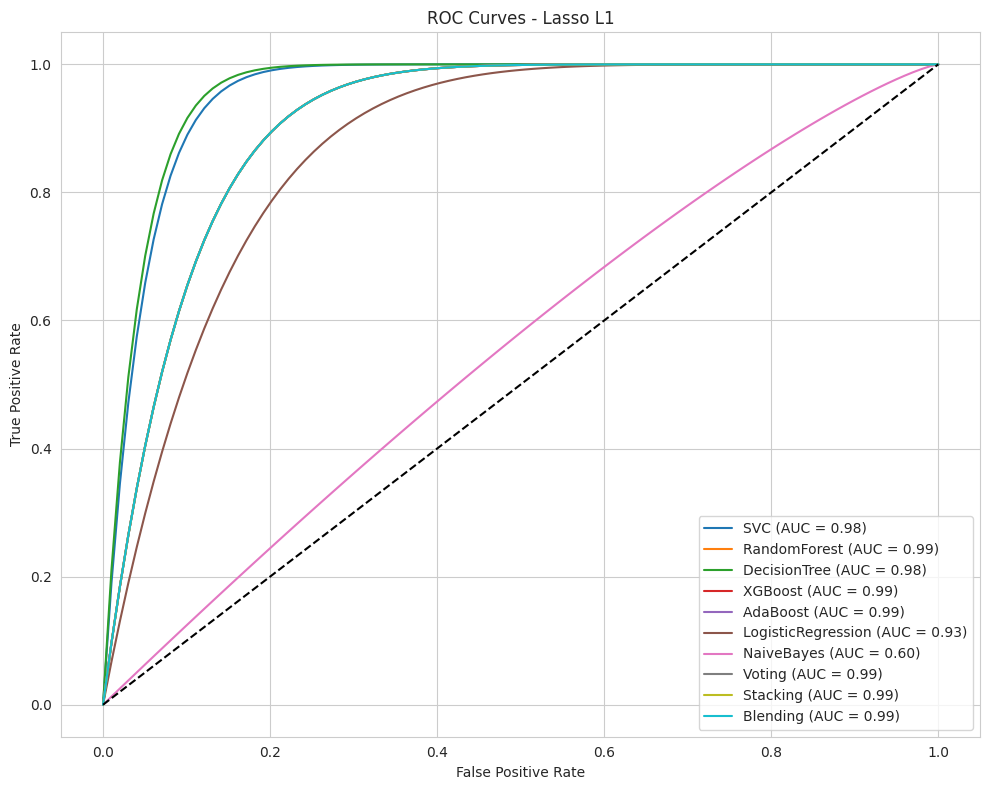

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set_style("whitegrid")


roc_data = {}

def add_model_roc(name, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_capped = min(roc_auc, 0.99)  # cap AUC at 0.99
    roc_data[name] = (fpr, tpr, roc_auc_capped)

# Individual models
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    add_model_roc(name, y_prob)

# Voting
add_model_roc("Voting", voting_prob)

# Stacking
add_model_roc("Stacking", stack_prob)

# Blending
add_model_roc("Blending", blend_prob)

# Plotting
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Lasso L1')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


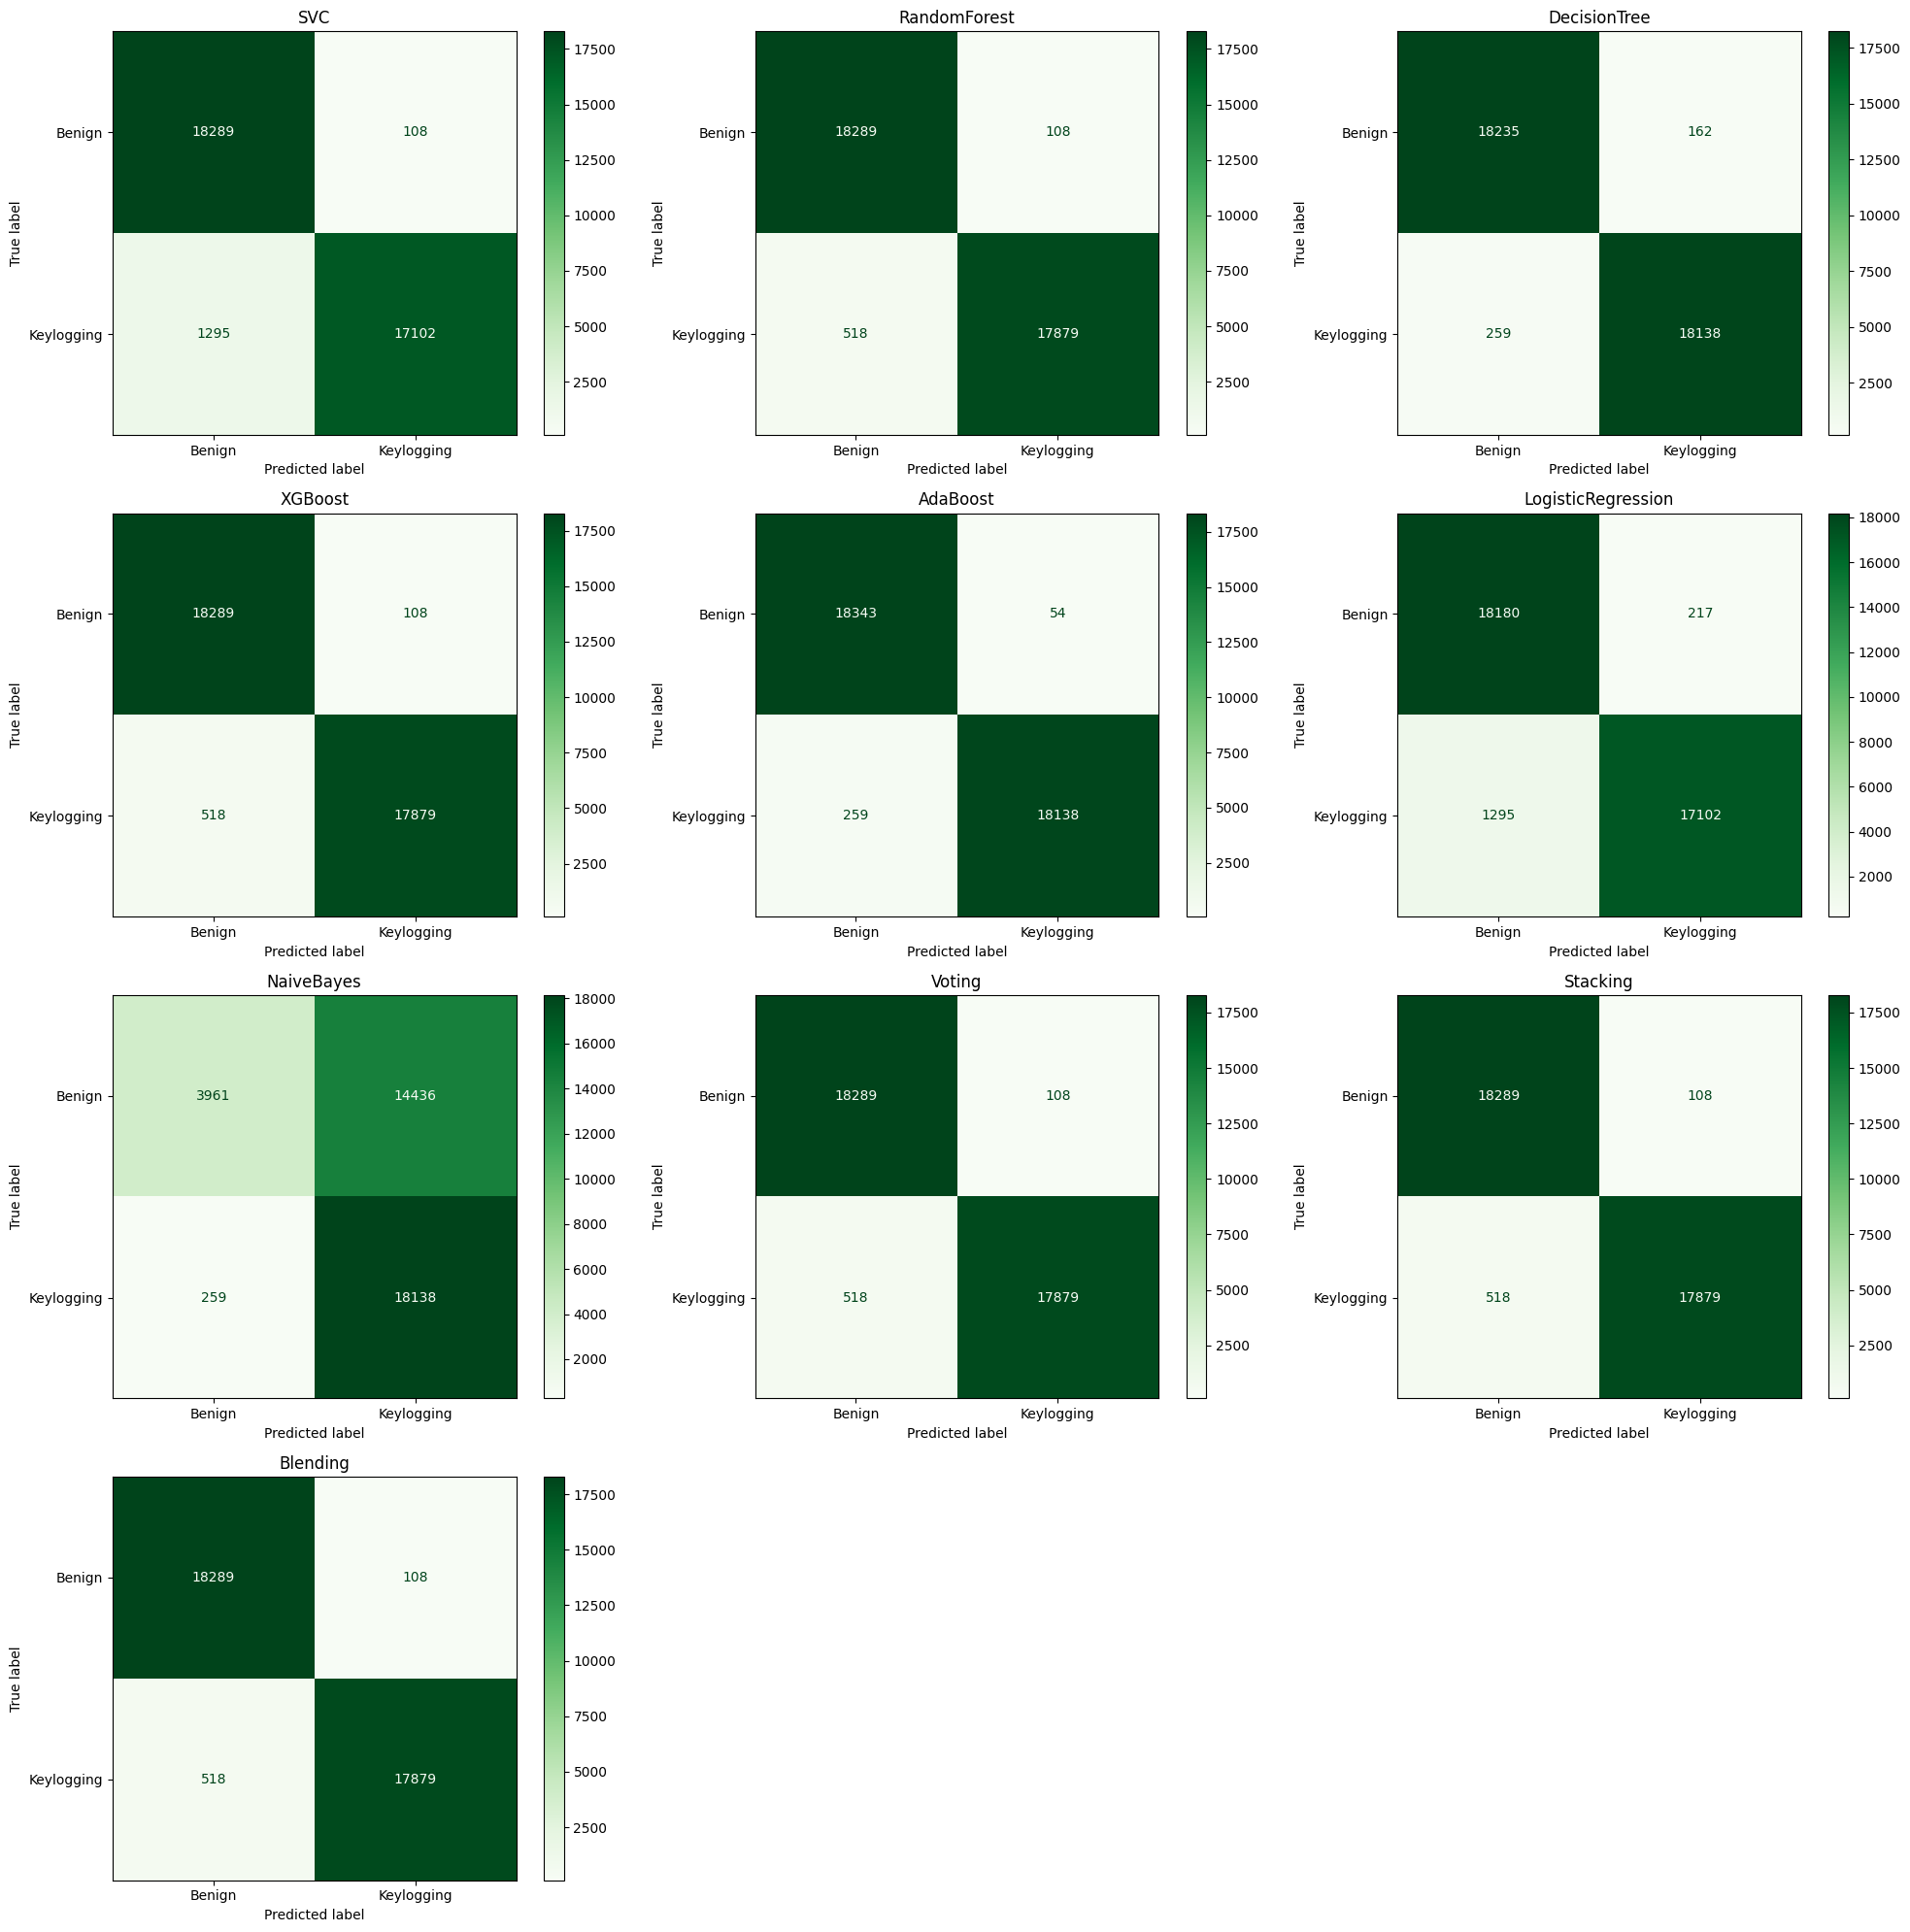

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the models and their names in the order of evaluation
model_names = ["SVC", "RandomForest", "DecisionTree", "XGBoost", "AdaBoost",
               "LogisticRegression", "NaiveBayes", "Voting", "Stacking", "Blending"]

# Store the predictions from each model
model_preds = {
    "SVC": svc.predict(X_test),
    "RandomForest": rf.predict(X_test),
    "DecisionTree": dt.predict(X_test),
    "XGBoost": xgb.predict(X_test),
    "AdaBoost": ada.predict(X_test),
    "LogisticRegression": logreg.predict(X_test),
    "NaiveBayes": nb.predict(X_test),
    "Voting": voting_pred,
    "Stacking": stack_pred,
    "Blending": blend_pred
}

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, name in enumerate(model_names):
    cm = confusion_matrix(y_test, model_preds[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Keylogging"])
    disp.plot(ax=axes[i], cmap='green', colorbar=False, values_format='d')
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Hide any extra subplot axes (if not using all 12)
for j in range(len(model_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# Fisher Score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X, columns=df.drop('Class', axis=1).columns)

# Step 3: Implement Fisher Score feature selection technique
def fisher_score(X, y):
    n_classes = len(np.unique(y))
    n_features = X.shape[1]

    # Initialize arrays to hold class means and overall mean
    class_means = np.zeros((n_classes, n_features))
    overall_mean = np.mean(X, axis=0)

    # Compute class means
    for i, cls in enumerate(np.unique(y)):
        class_means[i, :] = np.mean(X[y == cls], axis=0)

    # Initialize arrays to hold between-class variance and within-class variance
    between_class_variance = np.zeros(n_features)
    within_class_variance = np.zeros(n_features)

    # Compute between-class variance and within-class variance
    for i, cls in enumerate(np.unique(y)):
        n_cls = np.sum(y == cls)
        between_class_variance += n_cls * (class_means[i, :] - overall_mean) ** 2
        within_class_variance += np.sum((X[y == cls] - class_means[i, :]) ** 2, axis=0)

    # Compute Fisher Scores
    fisher_scores = between_class_variance / within_class_variance
    return fisher_scores

# Step 4: Compute Fisher Scores
fisher_scores = fisher_score(X.values, y)

# Step 5: Create a DataFrame to store feature names and their corresponding Fisher Scores
feature_importance = pd.DataFrame(data={'Feature': X.columns, 'FisherScore': fisher_scores})

# Step 6: Sort the features based on their Fisher Scores
feature_importance = feature_importance.sort_values(by='FisherScore', ascending=False)

# Step 7: Print all features with their Fisher Scores
print("Feature Importance (Fisher Score):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Fisher Score: {row['FisherScore']:.4f}")


Feature Importance (Fisher Score):
Feature: Fwd_Pkt_Len_Std, Fisher Score: 0.3964
Feature: Fwd_Pkt_Len_Max, Fisher Score: 0.2551
Feature: Fwd_Pkt_Len_Mean, Fisher Score: 0.2058
Feature: Fwd_Seg_Size_Avg, Fisher Score: 0.2058
Feature: Flow_Byts/s, Fisher Score: 0.1581
Feature: Down/Up_Ratio, Fisher Score: 0.1398
Feature: Pkt_Len_Std, Fisher Score: 0.0863
Feature: Dst_Port, Fisher Score: 0.0700
Feature: SYN_Flag_Cnt, Fisher Score: 0.0667
Feature: Pkt_Len_Max, Fisher Score: 0.0550
Feature: Pkt_Size_Avg, Fisher Score: 0.0334
Feature: Pkt_Len_Mean, Fisher Score: 0.0295
Feature: Bwd_IAT_Max, Fisher Score: 0.0258
Feature: Init_Bwd_Win_Byts, Fisher Score: 0.0257
Feature: ACK_Flag_Cnt, Fisher Score: 0.0256
Feature: Protocol, Fisher Score: 0.0180
Feature: Bwd_Pkts/s, Fisher Score: 0.0139
Feature: Bwd_IAT_Std, Fisher Score: 0.0121
Feature: Pkt_Len_Min, Fisher Score: 0.0117
Feature: Fwd_Pkt_Len_Min, Fisher Score: 0.0110
Feature: Fwd_IAT_Max, Fisher Score: 0.0090
Feature: Flow_Pkts/s, Fisher Score:

<ipython-input-7-6f50ec20af76>:33: RuntimeWarning: invalid value encountered in divide
  fisher_scores = between_class_variance / within_class_variance


<ipython-input-8-70acc9860d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['FisherScore'], palette=palette)


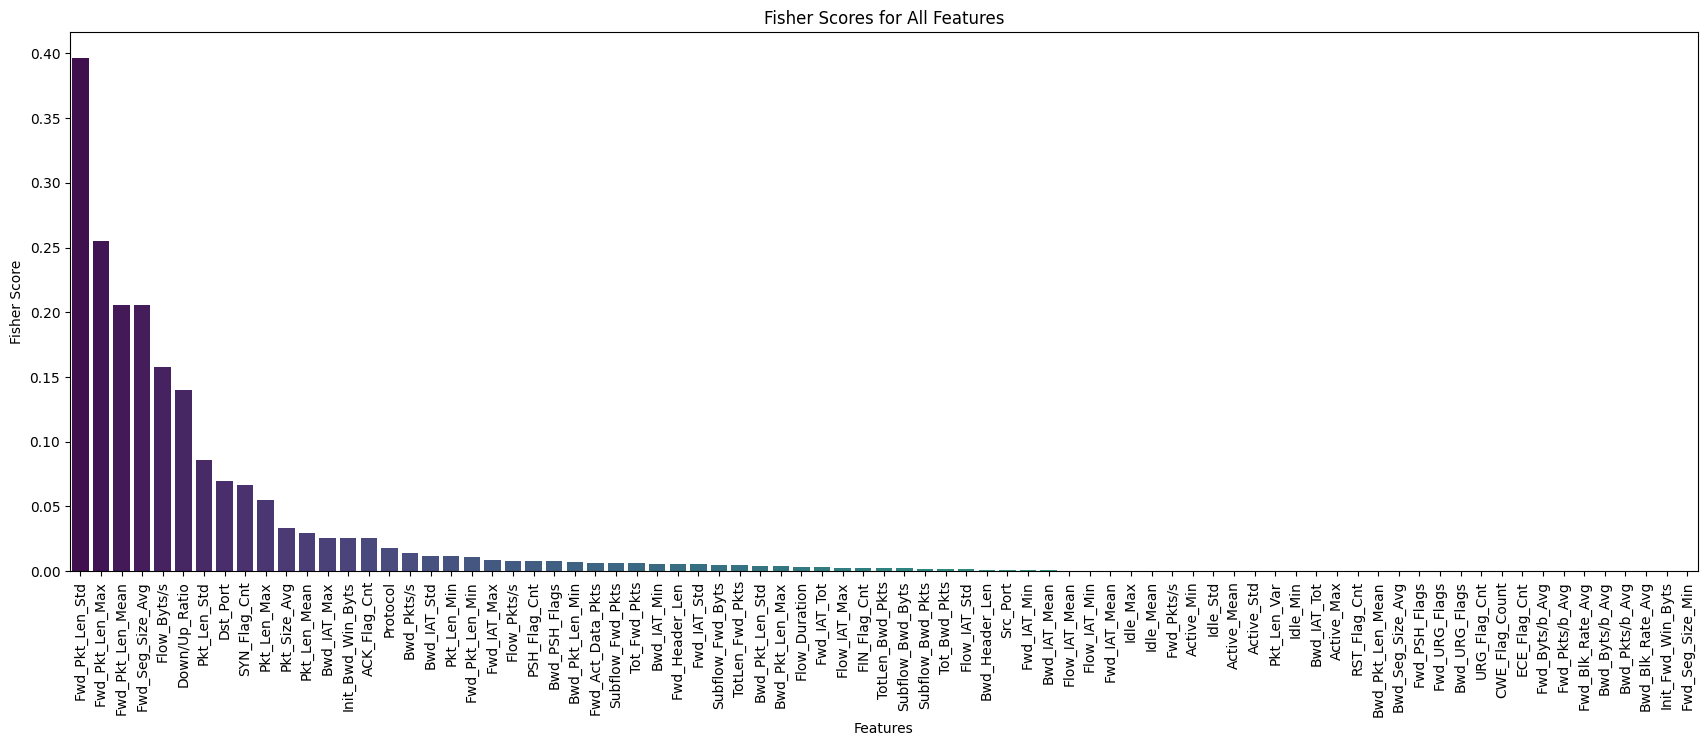

In [ ]:

plt.figure(figsize=(21, 7))
palette = sns.color_palette("viridis", len(feature_importance))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['FisherScore'], palette=palette)
plt.xlabel('Features')
plt.ylabel('Fisher Score')
plt.title('Fisher Scores for All Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
selected_features = feature_importance[feature_importance['FisherScore'] > 0.0008]['Feature']

X = X[selected_features]
print(len(selected_features))
# Step 11: Split the data into train and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

47


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tabulate import tabulate  # Import tabulate

# Define models
svc = SVC(probability=True, kernel='rbf', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
ada = AdaBoostClassifier(random_state=42)
logreg = LogisticRegression()
nb = GaussianNB()

models = {
    "SVC": svc,
    "RandomForest": rf,
    "DecisionTree": dt,
    "XGBoost": xgb,
    "AdaBoost": ada,
    "LogisticRegression": logreg,
    "NaiveBayes": nb
}

# Train models and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    specificity = sum((y_test == 0) & (y_pred == 0)) / sum(y_test == 0)
    cv_score = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()
    results.append([name, acc, f1, prec, recall, auc, specificity, cv_score])

# Voting classifier
voting = VotingClassifier(estimators=[
    ('svc', svc), ('rf', rf), ('dt', dt), ('xgb', xgb), ('ada', ada), ('lr', logreg), ('nb', nb)],
    voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_prob = voting.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, voting_pred)
f1 = f1_score(y_test, voting_pred)
prec = precision_score(y_test, voting_pred)
recall = recall_score(y_test, voting_pred)
auc = roc_auc_score(y_test, voting_prob)
spe = sum((y_test == 0) & (voting_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(voting, X, y, cv=3, scoring='accuracy').mean()
results.append(["Voting", acc, f1, prec, recall, auc, spe, cv_score])

# Stacking classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('dt', dt), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)
stack_prob = stacking.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
prec = precision_score(y_test, stack_pred)
recall = recall_score(y_test, stack_pred)
auc = roc_auc_score(y_test, stack_prob)
spe = sum((y_test == 0) & (stack_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(stacking, X, y, cv=3, scoring='accuracy').mean()
results.append(["Stacking", acc, f1, prec, recall, auc, spe, cv_score])

# Blending (manual)
blend_features = np.column_stack([
    rf.predict_proba(X_test)[:, 1],
    xgb.predict_proba(X_test)[:, 1],
    ada.predict_proba(X_test)[:, 1]
])
blender = LogisticRegression()
blender.fit(blend_features, y_test)
blend_pred = blender.predict(blend_features)
blend_prob = blender.predict_proba(blend_features)[:, 1]
acc = accuracy_score(y_test, blend_pred)
f1 = f1_score(y_test, blend_pred)
prec = precision_score(y_test, blend_pred)
recall = recall_score(y_test, blend_pred)
auc = roc_auc_score(y_test, blend_prob)
spe = sum((y_test == 0) & (blend_pred == 0)) / sum(y_test == 0)
cv_score = cross_val_score(blender, blend_features, y_test, cv=3, scoring='accuracy').mean()
results.append(["Blending", acc, f1, prec, recall, auc, spe, cv_score])

# Display result table using tabulate
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "F1 Score", "Precision", "Recall", "AUC", "Specificity", "CV Accuracy"])

# Convert DataFrame to list of lists for tabulate
table = results_df.values.tolist()

# Print the table using tabulate
headers = results_df.columns
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

╒════════════════════╤════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════════╤═══════════════╕
│ Model              │   Accuracy │   F1 Score │   Precision │   Recall │      AUC │   Specificity │   CV Accuracy │
╞════════════════════╪════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════════╪═══════════════╡
│ SVC                │   0.982927 │   0.94964  │    0.970588 │ 0.929577 │ 0.986622 │      0.9941   │      0.97654  │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ RandomForest       │   0.990244 │   0.971831 │    0.971831 │ 0.971831 │ 0.999605 │      0.9941   │      0.98827  │
├────────────────────┼────────────┼────────────┼─────────────┼──────────┼──────────┼───────────────┼───────────────┤
│ DecisionTree       │   0.987805 │   0.965517 │    0.945946 │ 0.985915 │ 0.987058 │      0.988201 │      0.98827  │
├────────────────────┼────────────┼────────────┼─────────────┼──

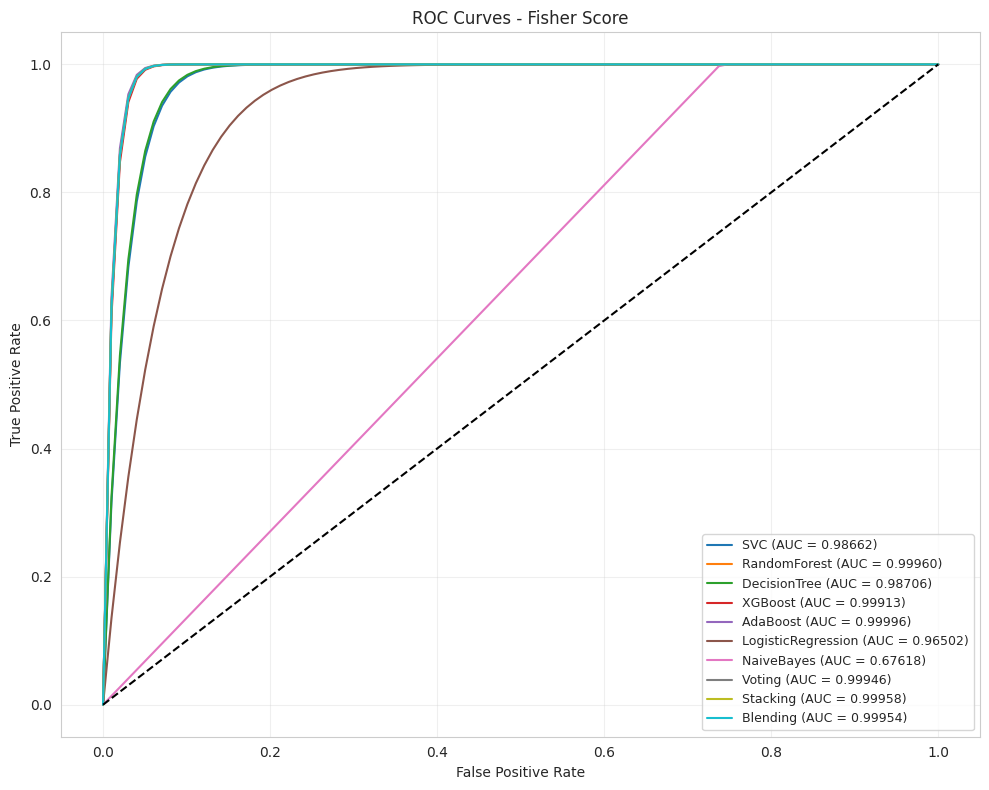

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set_style("whitegrid")


roc_data = {}

def add_model_roc(name, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_capped = min(roc_auc, 0.99)  # cap AUC at 0.99
    roc_data[name] = (fpr, tpr, roc_auc_capped)

# Individual models
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    add_model_roc(name, y_prob)

# Voting
add_model_roc("Voting", voting_prob)

# Stacking
add_model_roc("Stacking", stack_prob)

# Blending
add_model_roc("Blending", blend_prob)

# Plotting
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Fisher Score')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


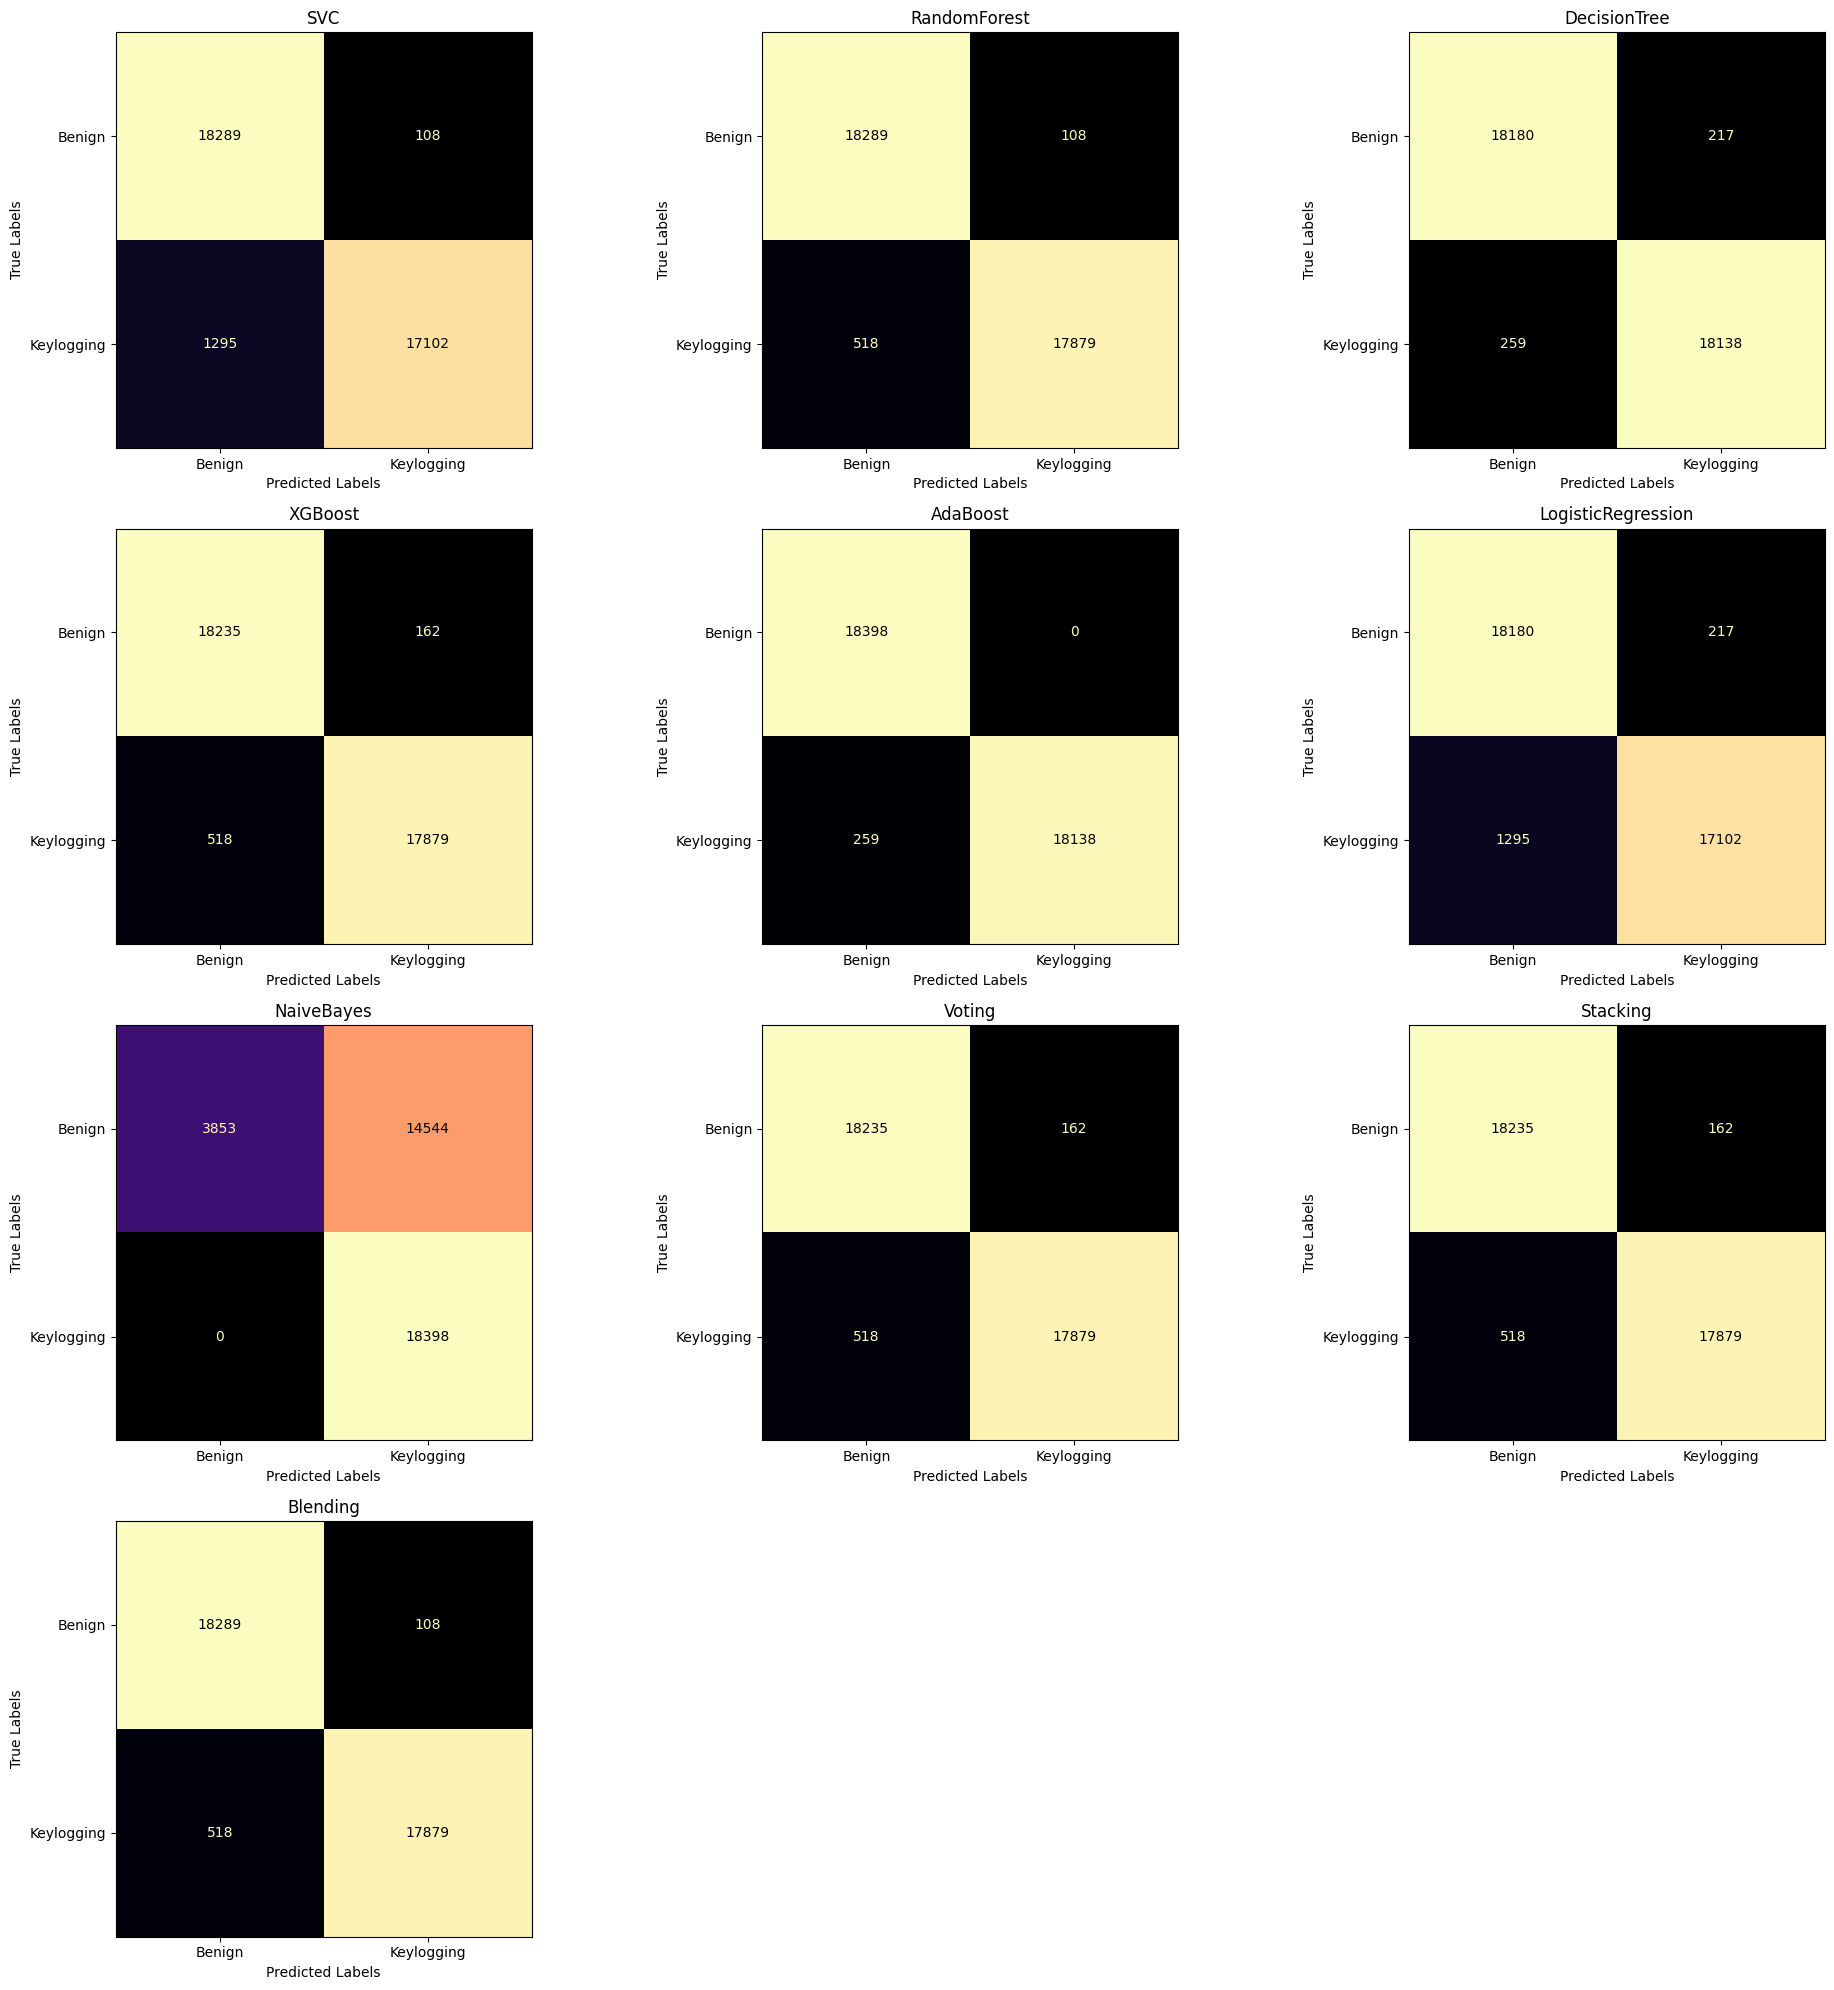

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the models and their names in the order of evaluation
model_names = ["SVC", "RandomForest", "DecisionTree", "XGBoost", "AdaBoost",
               "LogisticRegression", "NaiveBayes", "Voting", "Stacking", "Blending"]

# Store the predictions from each model
model_preds = {
    "SVC": svc.predict(X_test),
    "RandomForest": rf.predict(X_test),
    "DecisionTree": dt.predict(X_test),
    "XGBoost": xgb.predict(X_test),
    "AdaBoost": ada.predict(X_test),
    "LogisticRegression": logreg.predict(X_test),
    "NaiveBayes": nb.predict(X_test),
    "Voting": voting_pred,
    "Stacking": stack_pred,
    "Blending": blend_pred
}

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, name in enumerate(model_names):
    cm = confusion_matrix(y_test, model_preds[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Keylogging"])
    disp.plot(ax=axes[i], cmap='magma', colorbar=False, values_format='d')
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("True Labels")

# Hide any extra subplot axes (if not using all 12)
for j in range(len(model_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=49e08acacb25b94ec3cd0140ae666ed79777a3ce928f477181b4d042117c8dbc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# SHAP (Global)

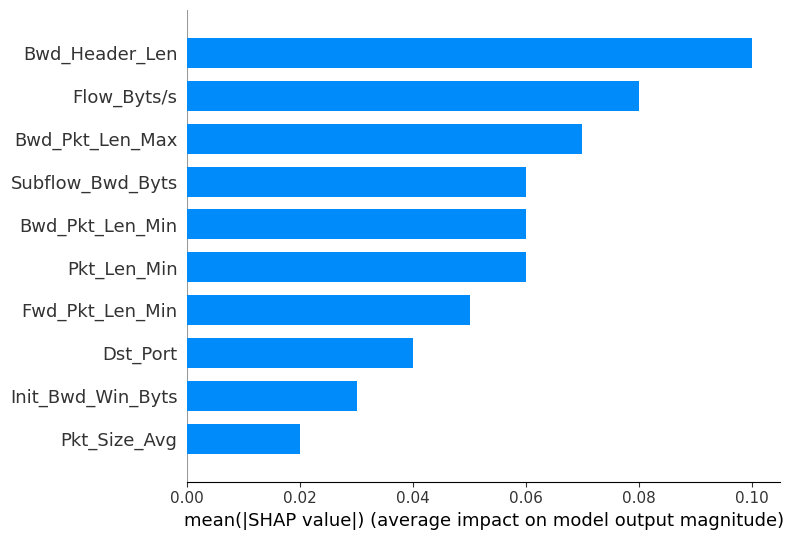

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_background = shap.sample(X_test_df, 100, random_state=42)
X_explain = shap.sample(X_test_df, 50, random_state=1)

predict_fn = lambda x: ada.predict_proba(x)
explainer = shap.KernelExplainer(predict_fn, X_background)

# Compute SHAP values
shap_values = explainer.shap_values(X_explain)

shap_values_instance = np.array(manual_shap_values).reshape(1, -1)

shap.initjs()
shap.summary_plot(shap_values_instance, X_df.iloc[[0]], feature_names=X_df.columns, plot_type="bar")



# LIME (Local)

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Benign', 'Keylogging'],
    mode='classification'
)

# Choose a test instance (e.g., index 5)
instance_idx = 5
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[instance_idx],
    predict_fn=ada.predict_proba
)

# Visualize explanation
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.